## Flu Shot - Final Exam - MRL



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

print("imported ....\n")

imported ....



In [2]:

# Define Quick print function

#    print("\n{}\n".format(x))
    
def pprint(x, y="Not Provided") :
    print("\nCommad Name is ==> : {}{}\n".format(y,x))
    

  

## Define a functions to read csv files using Pandas

In [3]:
# Define a function to read csv files using Pandas

# Specify filePath & fileExtension
filePath = '../data/'
fileExtension = ".csv"

def readCsv(filename):
    FullFileName = filePath + filename + fileExtension
    with open(FullFileName, 'r') as file:
        print("\nOpened for Reading DataFrame ==> \t{}\n".format(FullFileName))
        return pd.read_csv(file)
    
def writeCsv(DataFrame, filename):
    FullFileName = filePath + filename + fileExtension
    DataFrame.to_csv(FullFileName)
    print("\nWritten DataFrame ==> \t{}\n".format(FullFileName))
    



In [4]:
# Display files in filePath

print("\nWorking...")
import os
for dirname, _, filenames in os.walk(filePath):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Working...
../data/submission_format.csv
../data/test_set_features.csv
../data/training_set_features.csv
../data/training_set_labels.csv


## Create a list of filenames to be read & read them

### Specify filenames and assign them to short filenames

    df1n = "training_set_features"

    df2n = "training_set_labels"

    df3n = "test_set_features"

    df4n = "submission_format"

In [5]:
# Create a list of filenames to be read & read them

# Specify filenames and assign them to short filenames
df1n = "training_set_features"
df2n = "training_set_labels"
df3n = "test_set_features"
df4n = "submission_format"



# Create a list of Full filenames
# filenames = [filePath + df1n + fileExtension,
#               filePath + df2n + fileExtension,
#               filePath + df3n + fileExtension,
#               filePath + df4n + fileExtension
#            ]

filenames = [df1n,
             df2n,
             df3n, 
             df4n
            ]


# Read files Specified in the list and assign to short filenames

file_list = [readCsv(f)
                for f
                in filenames]

df1, df2, df3, df4  = file_list

 
pprint(df1.shape,df1n)
pprint(df2.shape,df2n)
pprint(df3.shape,df3n)
pprint(df4.shape,df4n)



Opened for Reading DataFrame ==> 	../data/training_set_features.csv


Opened for Reading DataFrame ==> 	../data/training_set_labels.csv


Opened for Reading DataFrame ==> 	../data/test_set_features.csv


Opened for Reading DataFrame ==> 	../data/submission_format.csv


Commad Name is ==> : training_set_features(26707, 36)


Commad Name is ==> : training_set_labels(26707, 3)


Commad Name is ==> : test_set_features(26708, 36)


Commad Name is ==> : submission_format(26708, 3)



## Assign filename to work with

    df         = df1  = df1n = "training_set_features"
    DF_y       = df2  = df2n = "training_set_labels"
    dfTest_Fea = df3  = df3n = "test_set_features"

In [7]:
# Assign filename to work with

df         = df1
DF_y       = df2
dfTest_Fea = df3

# pprint(df.info())
pprint(type(df),"Features - type ==>\t")
pprint(df.shape,"Features - shape ==>\t")

pprint(type(DF_y),"Labels - type ==>\t")
pprint(DF_y.shape,"Labels - shape ==>\t")

pprint(type(dfTest_Fea),"Test Features - type ==>\t")
pprint(dfTest_Fea.shape,"Test Features - shape ==>\t")



# Optional to be decided later

# df.drop(CDrop_List, axis=1, inplace=True)
# dfTest_Fea.drop(CDrop_List, axis=1, inplace=True)


# pprint(type(df))
# pprint(df.shape)
# pprint(type(dfTest_Fea))
# pprint(dfTest_Fea.shape)



# Create list of column names

dfnc = list(df.columns)




Commad Name is ==> : Features - type ==>	<class 'pandas.core.frame.DataFrame'>


Commad Name is ==> : Features - shape ==>	(26707, 36)


Commad Name is ==> : Labels - type ==>	<class 'pandas.core.frame.DataFrame'>


Commad Name is ==> : Labels - shape ==>	(26707, 3)


Commad Name is ==> : Test Features - type ==>	<class 'pandas.core.frame.DataFrame'>


Commad Name is ==> : Test Features - shape ==>	(26708, 36)



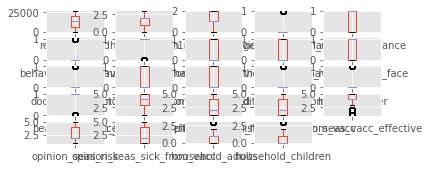

In [8]:
# Box plot

df.plot(kind='box', subplots=True, layout=(8,5), sharex=False, sharey=False)
plt.show()


Working ...


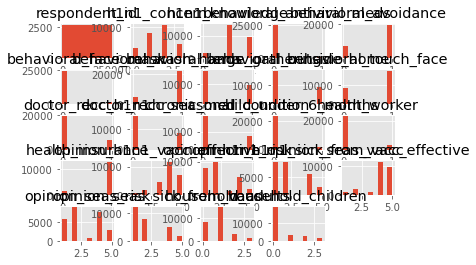

In [9]:
# histograms

print("\nWorking ...")
df.hist()
plt.show()


Working ...


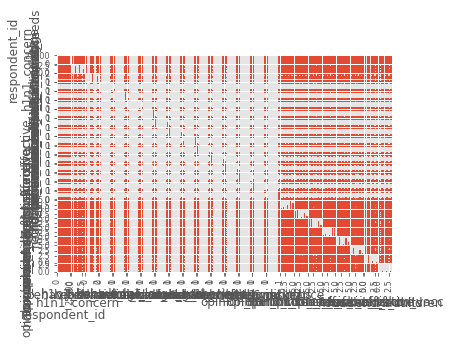

In [10]:
# scatter plot matrix

from pandas.plotting import scatter_matrix

print("\nWorking ...")
scatter_matrix(df)
plt.show()

# print("\nCommented out becuase it is taking lot of time. Need to try it in small chunks of data")

## Load libraries

### Later we will fine tune this to load only the minimum required libraries

In [11]:

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
import numpy as np

# Later we will fine tune this to load only the minimum required libraries

print("\nImported\n")





Imported



## Creating a list of Columns

    C_List_Full
    C_List_CAT
    C_List_NUM
    C_List_OBJ
    CFillna_List_OBJ
     
### Note First Column respondent_id is removed from the list

In [12]:
# Creating a list of Columns
# Note First Column respondent_id is removed from the list


C_List_Full = [
     'h1n1_concern',
     'h1n1_knowledge',
     'behavioral_antiviral_meds',
     'behavioral_avoidance',
     'behavioral_face_mask',
     'behavioral_wash_hands',
     'behavioral_large_gatherings',
     'behavioral_outside_home',
     'behavioral_touch_face',
     'doctor_recc_h1n1',
     'doctor_recc_seasonal',
     'chronic_med_condition',
     'child_under_6_months',
     'health_worker',
     'health_insurance',
     'opinion_h1n1_vacc_effective',
     'opinion_h1n1_risk',
     'opinion_h1n1_sick_from_vacc',
     'opinion_seas_vacc_effective',
     'opinion_seas_risk',
     'opinion_seas_sick_from_vacc',
     'age_group',
     'education',
     'race',
     'sex',
     'income_poverty',
     'marital_status',
     'rent_or_own',
     'employment_status',
     'hhs_geo_region',
     'census_msa',
     'household_adults',
     'household_children',
     'employment_industry',
     'employment_occupation'
    ]

C_List_CAT = [
     'h1n1_concern',
     'h1n1_knowledge',
     'behavioral_antiviral_meds',
     'behavioral_avoidance',
     'behavioral_face_mask',
     'behavioral_wash_hands',
     'behavioral_large_gatherings',
     'behavioral_outside_home',
     'behavioral_touch_face',
     'doctor_recc_h1n1',
     'doctor_recc_seasonal',
     'chronic_med_condition',
     'child_under_6_months',
     'health_worker',
     'health_insurance',
     'opinion_h1n1_vacc_effective',
     'opinion_h1n1_risk',
     'opinion_h1n1_sick_from_vacc',
     'opinion_seas_vacc_effective',
     'opinion_seas_risk',
     'opinion_seas_sick_from_vacc',
     'age_group',
     'education',
     'race',
     'sex',
     'income_poverty',
     'marital_status',
     'rent_or_own',
     'employment_status',
     'hhs_geo_region',
     'census_msa',
     'household_adults',
     'household_children'
    ]


C_List_NUM = [
     'h1n1_concern',
     'h1n1_knowledge',
     'behavioral_antiviral_meds',
     'behavioral_avoidance',
     'behavioral_face_mask',
     'behavioral_wash_hands',
     'behavioral_large_gatherings',
     'behavioral_outside_home',
     'behavioral_touch_face',
     'doctor_recc_h1n1',
     'doctor_recc_seasonal',
     'chronic_med_condition',
     'child_under_6_months',
     'health_worker',
     'health_insurance',
     'opinion_h1n1_vacc_effective',
     'opinion_h1n1_risk',
     'opinion_h1n1_sick_from_vacc',
     'opinion_seas_vacc_effective',
     'opinion_seas_risk',
     'opinion_seas_sick_from_vacc',
     'household_adults',
     'household_children'
    ]

C_List_OBJ = [
     'age_group',
     'education',
     'race',
     'sex',
     'income_poverty',
     'marital_status',
     'rent_or_own',
     'employment_status',
     'hhs_geo_region',
     'census_msa',
     'employment_industry',
     'employment_occupation'
    ]

CFillna_List_OBJ = [
     'age_group',
     'education',
     'race',
     'sex',
     'income_poverty',
     'marital_status',
     'rent_or_own',
     'employment_status',
     'hhs_geo_region',
     'census_msa',
     'employment_industry',
     'employment_occupation'
    ]

print('\nColumn Lists Created ...\n')


Column Lists Created ...



In [13]:
print('\n********** df.info() **********\n')
df.info()

print('\n********** dfTest_Fea.info() **********\n')
dfTest_Fea.info()


********** df.info() **********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-n

## Define & Test Functions

### Note: we will be Testing, Exploring, Cleaning & Manipulating both files

    df          =  df1n  =  "training_set_features"

    dfTest_Fea  =  df3n  =  "test_set_features"

In [14]:

# Define check_nulls function 

def Check_nulls(DF_N,col_name)  :

    # Find & Manupilate Nulls
    
    # DF_N = DataFrame & col_name = Column Name
    
    DF_N = DF_N
    col_name = col_name
    
    print("Checking Nulls >>> \n\n")

    # pprint(DF_N.isna())
    
    pprint(DF_N[col_name].isna().any(),"DF_N[col_name].isna().any() ==>  ANY NULLs ==>\t")
    
    pprint(DF_N[col_name].isna().sum(),"DF_N[col_name].isna().sum() ==>  SUM NULLs ==>\t")

    # Plot missing Data - Bar chart
    DF_N.isna().sum().plot(kind="bar")
    plt.show()



**********Check_nulls(df, "education")**********

Checking Nulls >>> 



Commad Name is ==> : DF_N[col_name].isna().any() ==>  ANY NULLs ==>	True


Commad Name is ==> : DF_N[col_name].isna().sum() ==>  SUM NULLs ==>	1407



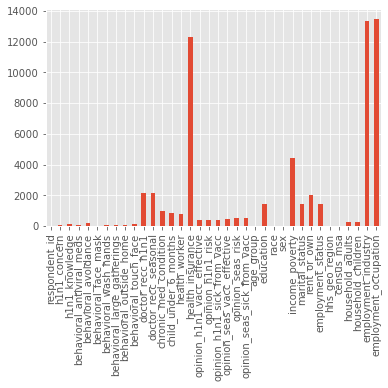


**********Check_nulls(dfTest_Fea, "education")**********

Checking Nulls >>> 



Commad Name is ==> : DF_N[col_name].isna().any() ==>  ANY NULLs ==>	True


Commad Name is ==> : DF_N[col_name].isna().sum() ==>  SUM NULLs ==>	1407



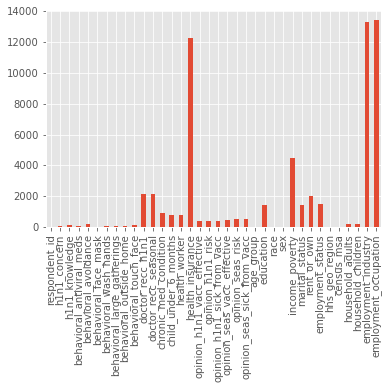

In [15]:
print('\n**********Check_nulls(df, "education")**********\n')
Check_nulls(df, "education")

print('\n**********Check_nulls(dfTest_Fea, "education")**********\n')
Check_nulls(dfTest_Fea, "education")

In [16]:
# Define review_nulls


def review_nulls(DF_N) :

# Assign file name to Review Missing Data
    # DF_N = Data Frame
    DF_N = DF_N

# Review missing Data

    DF_N_nullity = DF_N.isnull()
#    pprint(DF_N_nullity.head())

# Count of Nulls
    pprint(DF_N_nullity.sum(), "Count of Nulls ==> COUNT NULLs ==>\n")

# Percentage of mean of nulls
    pprint(DF_N_nullity.mean() * 100, "Percentage of mean of nulls ==> PERCENT NULLs % ==>\n")
    


In [17]:
print("\n**********review_nulls(df)**********\n")
review_nulls(df)

print("\n**********review_nulls(dfTest_Fea)**********\n")
review_nulls(dfTest_Fea)


**********review_nulls(df)**********


Commad Name is ==> : Count of Nulls ==> COUNT NULLs ==>
respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race            

In [18]:

# Define check_outliers function 

def Check_outliers(DF_N)  :

    DF_N = DF_N
    # Plot outliers Data - Box chart
    DF_N.plot(kind="box")
    plt.show()


**********Check_outliers(df["h1n1_concern"])**********



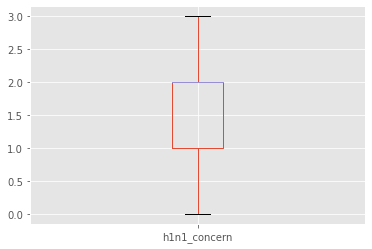


**********Check_outliers(dfTest_Fea["h1n1_concern"])**********



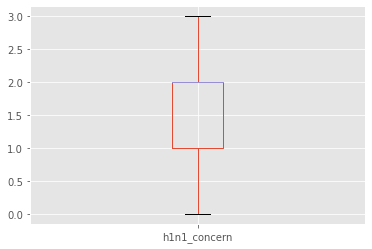


**********Check_outliers(df)**********



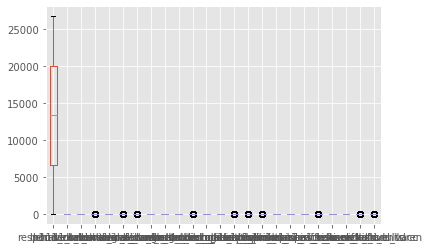


**********Check_outliers(dfTest_Fea)**********



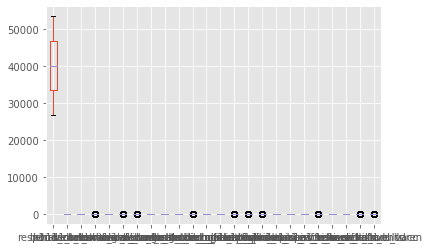

In [19]:
print('\n**********Check_outliers(df["h1n1_concern"])**********\n')
Check_outliers(df["h1n1_concern"])

print('\n**********Check_outliers(dfTest_Fea["h1n1_concern"])**********\n')
Check_outliers(dfTest_Fea["h1n1_concern"])

print('\n**********Check_outliers(df)**********\n')
Check_outliers(df)

print('\n**********Check_outliers(dfTest_Fea)**********\n')
Check_outliers(dfTest_Fea)


In [20]:
# Duplicate values_Short


def Check_Duplicate_values_short(DF_N) :
    
 
     # Duplicate_values()
    
    # DF_N = DataFrame 

    DF_N = DF_N
    
    # Get duplicates across all columns

    duplicatesSum = DF_N.duplicated().sum()
    print("\nDUPLICATE Columns are ==>\t{}\n".format(duplicatesSum))

    # Get duplicate rows
    
    if duplicatesSum != 0 :
        duplicates = DF_N.duplicated()
        print("\n\nDUPLICATES FOUND \n Duplicate Rows are ==> \n{}\n".format(DF_N[duplicates]))
    else :
        print("\nDUPLICATES NOT FOUND ==>\tOK\n\n")


In [21]:
print("\n**********Check_Duplicate_values_short(df)**********\n")
Check_Duplicate_values_short(df)


print("\n**********Check_Duplicate_values_short(dfTest_Fea)**********\n")
Check_Duplicate_values_short(dfTest_Fea)


**********Check_Duplicate_values_short(df)**********


DUPLICATE Columns are ==>	0


DUPLICATES NOT FOUND ==>	OK



**********Check_Duplicate_values_short(dfTest_Fea)**********


DUPLICATE Columns are ==>	0


DUPLICATES NOT FOUND ==>	OK




In [22]:
    # Get status column

def Status_of_Columns(DF_N,col_name)  :
    
        """
        # DF_N = DataFrame & col_name = Column Name
        """
    
        DF_N = DF_N
        col_name = col_name

        status = DF_N[col_name]
        pprint(status.value_counts(), "Get status of columns ==> COLUMN COUNTS ==>\n")

        # Get value counts on DataFrame

        pprint(DF_N.groupby(col_name).count(),"Get GROUPBY value counts on DataFrame ==> DF COUNTS ==>\n")
    
    

In [23]:
print('\n**********Status_of_Columns(df,"race")**********\n')
Status_of_Columns(df,"race")

print('\n**********Status_of_Columns(dfTest_Fea,"race")**********\n')
Status_of_Columns(dfTest_Fea,"race")


**********Status_of_Columns(df,"race")**********


Commad Name is ==> : Get status of columns ==> COLUMN COUNTS ==>
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64


Commad Name is ==> : Get GROUPBY value counts on DataFrame ==> DF COUNTS ==>
                   respondent_id  h1n1_concern  h1n1_knowledge  \
race                                                             
Black                       2118          2106            2109   
Hispanic                    1755          1748            1747   
Other or Multiple           1612          1604            1600   
White                      21222         21157           21135   

                   behavioral_antiviral_meds  behavioral_avoidance  \
race                                                                 
Black                                   2112                  2096   
Hispanic                                1749                  17

## REVIEW NUMERIC COLUMNS

    Shape
    Count
    Nulls - Any
    Nulls - Sum
    Value - Minimum
    Value - Maximum
    Describe
    Outliers 
    
### Check whether Nulls can be Replaced with statistical measures
    mean
    mode
    

In [24]:
# Review Column 
# eg col_name = 'h1n1_concern'

# USE THIS FUNCTION TO REVIEW NUMERIC COLUMNS

def Review_Column_Num(DF_N,col_name,m) : 
    
    # DF_N = Dataframe
    
    # Assign Column Name to Review

    DF_N = DF_N
    col_name = col_name
    m = m
        
    print("\nREVIEW COLUMN NUM ==> \t{}".format(col_name))
    
#    print("\n m = 'mean' or 'mode'")

#    print("\nColumn Name is ==>  {} \t fillna method is ==>  {}".format(col_name, m))
          
        
    pprint(DF_N.shape,"DF_N.shape - SHAPE ==>\t")
    pprint(DF_N[col_name].count(),"DF_N[col_name].count() - COUNT\t")
#    pprint(DF_N.shape[0] - DF_N[col_name].count(),"DF_N.shape[0] - DF_N[col_name].count() - Count of Difference ==>\t")

    pprint(DF_N[col_name].isna().any(),"DF_N[col_name].isna().any() - ANY NULLs ==>\t")
    pprint(DF_N[col_name].isna().sum(),"DF_N[col_name].isna().sum() - SUM NULLs ==>\t")
    
#    assert x[col_name].isna().sum() == 0
    
    pprint(DF_N[col_name].min(),"DF_N[col_name].min() - Value MIN ==> \t")
    pprint(DF_N[col_name].max(),"DF_N[col_name].max() - Value MAX ==> \t")


    pprint(DF_N[col_name].describe(),"DF_N[col_name].describe() - DESCRIBE ==> \n")

    pprint("\nplot", "Check_outliers(DF_N[col_name]) - OUTLIERS ==>\n")
    Check_outliers(DF_N[col_name])



    # Check whether NUlls can be Replaced with statistical measures

    if m == 'mean' :
        col_mean = DF_N[col_name].mean()
        print('\nMETHOD is MEAN Value ==> \t{}\n'.format(col_mean))
        col_imputed = DF_N.fillna({col_name: col_mean})
    if m == 'mode' :
        col_mode = DF_N[col_name].mode()
        print('\nMETHOD is MODE Value ==> \t{}\n'.format(col_mode[0]))
        col_imputed = DF_N.fillna({col_name: col_mode[0]})

    pprint(col_imputed[col_name].isna().any(), "col_imputed[col_name].isna().any() - \nRemaining NULLs after relacement Test - Any ==> \t")
    pprint(col_imputed[col_name].isna().sum(),"col_imputed[col_name].isna().sum() - \nRemaining NULLs after relacement Test - Sum ==> \t")
    
    assert col_imputed[col_name].isna().sum() == 0
    print("\nAssert Note: No error message means it passed the test\nCheck Assert Error ... if yes, then Resolve else Continue ...\n")

    pprint(col_imputed[col_name].describe(), "col_imputed[col_name].describe() ==> \nDESCRIBE after Nulls replacement Test RESULTs ==> \n")





**********Review_Column_Num(df,"h1n1_concern","mode")**********


REVIEW COLUMN NUM ==> 	h1n1_concern

Commad Name is ==> : DF_N.shape - SHAPE ==>	(26707, 36)


Commad Name is ==> : DF_N[col_name].count() - COUNT	26615


Commad Name is ==> : DF_N[col_name].isna().any() - ANY NULLs ==>	True


Commad Name is ==> : DF_N[col_name].isna().sum() - SUM NULLs ==>	92


Commad Name is ==> : DF_N[col_name].min() - Value MIN ==> 	0.0


Commad Name is ==> : DF_N[col_name].max() - Value MAX ==> 	3.0


Commad Name is ==> : DF_N[col_name].describe() - DESCRIBE ==> 
count    26615.000000
mean         1.618486
std          0.910311
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: h1n1_concern, dtype: float64


Commad Name is ==> : Check_outliers(DF_N[col_name]) - OUTLIERS ==>

plot



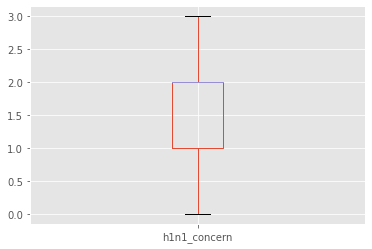


METHOD is MODE Value ==> 	2.0


Commad Name is ==> : col_imputed[col_name].isna().any() - 
Remaining NULLs after relacement Test - Any ==> 	False


Commad Name is ==> : col_imputed[col_name].isna().sum() - 
Remaining NULLs after relacement Test - Sum ==> 	0


Assert Note: No error message means it passed the test
Check Assert Error ... if yes, then Resolve else Continue ...


Commad Name is ==> : col_imputed[col_name].describe() ==> 
DESCRIBE after Nulls replacement Test RESULTs ==> 
count    26707.000000
mean         1.619800
std          0.909016
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: h1n1_concern, dtype: float64


**********Review_Column_Num(dfTest_Fea,"h1n1_concern","mode")**********


REVIEW COLUMN NUM ==> 	h1n1_concern

Commad Name is ==> : DF_N.shape - SHAPE ==>	(26708, 36)


Commad Name is ==> : DF_N[col_name].count() - COUNT	26623


Commad Name is ==> : DF_N[col_name].isna().any() - ANY NULLs ==>	Tru

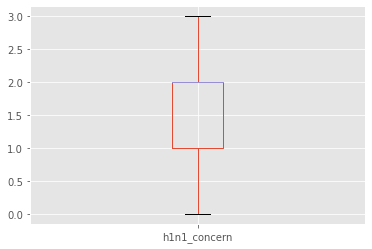


METHOD is MODE Value ==> 	2.0


Commad Name is ==> : col_imputed[col_name].isna().any() - 
Remaining NULLs after relacement Test - Any ==> 	False


Commad Name is ==> : col_imputed[col_name].isna().sum() - 
Remaining NULLs after relacement Test - Sum ==> 	0


Assert Note: No error message means it passed the test
Check Assert Error ... if yes, then Resolve else Continue ...


Commad Name is ==> : col_imputed[col_name].describe() ==> 
DESCRIBE after Nulls replacement Test RESULTs ==> 
count    26708.000000
mean         1.624345
std          0.901567
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: h1n1_concern, dtype: float64



In [25]:
print('\n**********Review_Column_Num(df,"h1n1_concern","mode")**********\n')
Review_Column_Num(df,"h1n1_concern","mode")


print('\n**********Review_Column_Num(dfTest_Fea,"h1n1_concern","mode")**********\n')
Review_Column_Num(dfTest_Fea,"h1n1_concern","mode")

## Replacing NULLs by using statistical measures

    mean
    mode

In [26]:
#Replacing NULLs by using statistical measures 
# eg col_name = 'h1n1_concern'

# USE THIS FUNCTION TO Replacing NULLs by using statistical measures

def Replacing_NULLS_with_statistical_measures(DF_N,col_name,m) : 
    
    """
    df = Replacing_NULLS_with_statistical_measures(DF_N,col_name,m)
    
    # DF_N = Dataframe
    # col_name = Assign Column Name to Replace Nulls
    # m = FILLNA method MODE or MEAN
    """
    
    DF_N = DF_N
    col_name = col_name
    m = m
        
    print("\nReplacement COLUMN Name ==>\t{}\n".format(col_name))
    
    #Replacing with statistical measures

    if m == 'mean' :
        col_mean = DF_N[col_name].mean()
        print('\nFILLNA method is MEAN ==>\t{}\n'.format(col_mean))
        col_imputed = DF_N.fillna({col_name: col_mean})
    if m == 'mode' :
        col_mode = DF_N[col_name].mode()
        print('\nFILLNA method is MODE ==>\t{}\n'.format(col_mode[0]))
        col_imputed = DF_N.fillna({col_name: col_mode[0]})
   
    assert col_imputed[col_name].isna().sum() == 0
    print("\nAssert Note: No error message means it passed the test\nCheck Assert Error ... if yes, then Resolve else Continue ...\n")
   
    print("\nNULLs REMOVED ...\n")
    return (col_imputed[col_name])



## Replace Nulls in Numeric Column

In [27]:
# Replace Nulls

def Replace_Nulls_Num (DF_N,col_name,m) :

    DF_N = DF_N
    col_name = col_name
    m = m
    
    print("\nWorking on Column Name ==> \t{}".format(col_name))
    pprint(DF_N[col_name].isna().any(),"DF_N[col_name].isna().any() ==> NULLs ANY Before\t")
    pprint(DF_N[col_name].isna().any(),"DF_N[col_name].isna().sum() ==> NULLs SUM Before\t")

    DF_N[col_name] = Replacing_NULLS_with_statistical_measures(DF_N,col_name, m )
    
    print("\nNULLs REMOVED ...\n")

    pprint(DF_N[col_name].isna().any(),"DF_N[col_name].isna().any() ==> NULLs ANY After\t")
    pprint(DF_N[col_name].isna().any(),"DF_N[col_name].isna().sum() ==> NULLs SUM After\t")


## Replace NULLs in all Numeric Columns
    based on the supplied list of Columns

In [28]:
# Replace NULLs in all Numeric Columns[C_List_NUM]

# REPLACE NULLs from ALL NUMERIC Columns C_List_NUM]

# df = Replace_Nulls_in_ALL_NUMERIC_COLs (df, C_List_NUM, "mode")

def Replace_Nulls_in_ALL_NUMERIC_COLs(DF_N, C_List_NUM, m) :

    
    """
    # df = Replace_Nulls_in_ALL_NUMERIC_COLs (df, C_List_NUM, "mode")
    """
    
    DF_N = DF_N
    
    C_List_NUM = C_List_NUM
    
    m = m
    
    for i in C_List_NUM :
        Replace_Nulls_Num (DF_N, i, m )
        print("\t{} ... DONE".format(i))

    review_nulls(DF_N)

## Replace Nulls In Columns having type "OBJECT"

### RUN THIS ONLY AFTER NULLs have been REMOVED from NUMERICs

In [29]:
# Replace_Nulls_ In Columns type OBJECT 

# RUN THIS ONLY AFTER NULLs have been REMOVED from NUMERICs



def Replace_Nulls_in_ALL_OBJECT_COLs (DF_N, m)  :
    
    """
    
    # RUN THIS ONLY AFTER NULLs have been REMOVED from NUMERICs
    
    df = Replace_Nulls_in_ALL_OBJECT_COLs (df, 'ffill')
    
    or 
    
    df = Replace_Nulls_in_ALL_OBJECT_COLs (df, 'bfill')

    # Replace_Nulls_ In Columns type OBJECT 

    # REPLACE ALL NULLs in OBJ by "ffill"
    # Note: You may be required to run also with "bfill"
    
    # DF_N = DF_N is the name of DataFrame
    # m = Method can be "ffill" or "bfill"


    """

    DF_N = DF_N
    method_equals = m
    
    DF_N.fillna(method = method_equals, inplace=True)

    print("\nNULLs REMOVED... Verify \n")
    
    # DF_N.info()

    review_nulls(DF_N)
    
    return(DF_N)




## Check whether Data in the Column is within the provided Range

    Basically looking for values which may be out of Range 
    & if there are then take action to resolve them

In [30]:
# Check Range
# Check whether Data in the Column is within the provided Range
    #   Basically looking for values which may be out of Range 
    #   & if there are then take action to resolve them

# Use this function to Check Range of column data

def Check_Range(DF_N, col_name,a=0,b=5) :
    
    """
    # Check_Range(y,a=0,b=5)

    # To AVOID OVER WRITING the original Data ==> REMOVE assignmet eg 'DF_N['y'] ='

    # DF_N = DataFrame & y = Column Name & a = MInimum Value & b = Maximum Value   
    
    # Drop values using filtering
    # DF_N = DF_N[DF_N['y'] <= b]

    # Drop values using .drop()
    # DF_N.drop(DF_N[DF_N['y'] > b].index, inplace = True)

    # Assert results
    # assert DF_N['y'].max() <= b

    # Convert avg_rating > b to b
    # DF_N.loc[DF_N['y'] > b, 'y'] = b

    # Assert statement
    # assert DF_N['y'].max() <= b

    """
    
    # Assign the dataframe to DF_N
    
    DF_N = DF_N
    col_name = col_name
    
    # Range Parameters
    a = a
    b = b
    
    print("\nCHECK RANGE for Column Name ==>\t{} \n".format(col_name))
    
    pprint(DF_N[col_name].max(),"DF_N[col_name].max() - value is MAX  ==>\t")
    pprint(DF_N[col_name].min(),"DF_N[col_name].min() - value is MIN ==>\t")
    print("the parameters provided are a == {} & b == {}\n".format(a,b))
    
    assert DF_N[col_name].max() <= b
    assert DF_N[col_name].min() == a
    assert DF_N[col_name].max() == b
    print("Assert Note: No error message means it passed the test\nCheck Assert Error ... if yes, then Resolve else Continue ...\n")
    
    # Output DF_N with col_name > b
    d = DF_N[DF_N[col_name] > b ]
    e = d[col_name].count()
    pprint(e,"d = DF_N[DF_N[col_name] > b ] - Check Greater Then b ==>\t")

    # Output DF_N with col_name < a
    d = DF_N[DF_N[col_name] < a ]
    e = d[col_name].count()
    pprint(e,"d = DF_N[DF_N[col_name] < a ] - Check Less Then a ==>\t")

    # Output DF_N with col_name <= b
    d = DF_N[DF_N[col_name] <= b ]
    e = d[col_name].count()
    pprint(e,"d = DF_N[DF_N[col_name] <= b ]  - Check Less Then Equal to b ==>\t")

    # Output DF_N with col_name >= a
    d = DF_N[DF_N[col_name] >= a ]
    e = d[col_name].count()
    pprint(e,"d = DF_N[DF_N[col_name] >= a ]  - Check Greater Then Equal to a ==>\t")

    

## Data Range Constraints
### Review & Plot


In [31]:
# Data Range Constraints
    #   Review & Plot


def Data_range_constraints(DF_N, col_name="", r="") :
    
    """
   
    # Example:
    # Data_range_constraints(df, 'h1n1_concern', "0-3")

    # Syntax for Data_range_constraintsl is : 
    # Data_range_constraints(DF_N,'col_name','r')

    # DF_N = DataFrame & col_name = cloumn name & r = expected range "(a - e)" as string
    
    # DF_N[col_name].describe()
    
    # DF_N[col_name].unique()
    
    # import matplotlib.pyplot as plt

    # plt.hist(DF_N[col_name])

    # plt.title(col_name of DF_N (range))
    
    """
    
    DF_N = DF_N
    col_name = col_name
    
    range = r
    
    if col_name != "" :

        print("\nData Range Constraints for Column ... ==>\t{}\n".format(col_name))
        pprint(DF_N[col_name].describe(),"DESCRIBE ... ==>\n")
        pprint(DF_N[col_name].unique(),"UNIQUE ... ==>\n")
    
        import matplotlib.pyplot as plt

        # DF_N[col_name].sort_values(by = col_name)
#        plt.hist(DF_N[col_name])

        plt.hist(DF_N[col_name].sort_values())

        plt.title(col_name + " (" + range + ")")
        
        plt.show()
        

    
    


**********Data_range_constraints(df, "h1n1_concern", "0-3")**********


Data Range Constraints for Column ... ==>	h1n1_concern


Commad Name is ==> : DESCRIBE ... ==>
count    26615.000000
mean         1.618486
std          0.910311
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: h1n1_concern, dtype: float64


Commad Name is ==> : UNIQUE ... ==>
[ 1.  3.  2.  0. nan]



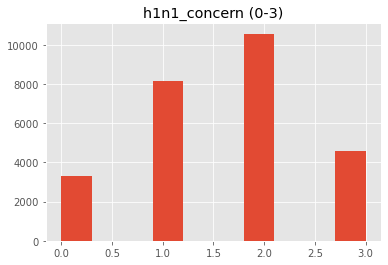


**********Data_range_constraints(dfTest_Fea, "h1n1_concern", "0-3")**********


Data Range Constraints for Column ... ==>	h1n1_concern


Commad Name is ==> : DESCRIBE ... ==>
count    26623.000000
mean         1.623145
std          0.902755
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: h1n1_concern, dtype: float64


Commad Name is ==> : UNIQUE ... ==>
[ 2.  1.  3.  0. nan]



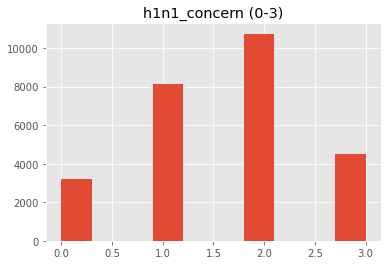

In [32]:
print('\n**********Data_range_constraints(df, "h1n1_concern", "0-3")**********\n')
Data_range_constraints(df, "h1n1_concern", "0-3")

print('\n**********Data_range_constraints(dfTest_Fea, "h1n1_concern", "0-3")**********\n')
Data_range_constraints(dfTest_Fea, "h1n1_concern", "0-3")

## Review Text
    Dtype
    type
    Describe
    Count
    Unique
     
    Head
    Tail
    Keys
    Values
    Index
    
    Check Nulls
    
    Check Constrains
    
    Check Status_of_Columns
    
    Check Duplicates
    
    

In [33]:
# Review_Text

def Review_Text(DF_N, col_name)  :

    """
        # Syntax for String_to_integers is : 
        
        # It may OVER WRITE the original Data. 
        # To AVOID REMOVE assignmet 'DF_N[col_name] =' "

        # DF_N = Data Frame & col_name = cloumn name
        
    """
    DF_N = DF_N
    col_name = col_name
    
    print("\nColumn name is ==>\t{}\n".format(col_name))

    pprint(DF_N[col_name].dtypes,"DF_N[col_name].dtypes ==> DTYPES ==> \t")
    pprint(type(DF_N[col_name]),"type(DF_N[col_name])==> TYPE ==> \t")
    pprint(DF_N[col_name].describe(), "DF_N[col_name].describe() ==> DESCRIBE ==> \n")
    pprint(DF_N[col_name].count(),"DF_N[col_name].count() ==> COUNT ==> \t")
    pprint(DF_N[col_name].unique(),"\nDF_N[col_name].unique() ==> UNIQUE ==> \n")
    
    pprint(Check_nulls(DF_N,col_name),"Check_nulls(DF_N,col_name) ==> Check NULLs ==> \t")

    
    pprint(DF_N[col_name].head(),"DF_N[col_name].head() ==> HEAD ==> \n")
    pprint(DF_N[col_name].tail(),"DF_N[col_name].tail() ==> TAIL ==> \n")
    pprint(DF_N[col_name].keys(),"DF_N[col_name].keys() ==> KEYS ==> \n")
    pprint(DF_N[col_name].values,"DF_N[col_name].values ==> VALUES ==> \n")
    pprint(DF_N[col_name].index,"DF_N[col_name].index ==> INDEX ==> \n")
    
    pprint(Data_range_constraints(DF_N,col_name," "),"Check CONSTRAINT  ==> \t")
    
    Status_of_Columns(DF_N, col_name)
    
    Check_Duplicate_values_short(DF_N)


    


**********Review_Text(df,"age_group")**********


Column name is ==>	age_group


Commad Name is ==> : DF_N[col_name].dtypes ==> DTYPES ==> 	object


Commad Name is ==> : type(DF_N[col_name])==> TYPE ==> 	<class 'pandas.core.series.Series'>


Commad Name is ==> : DF_N[col_name].describe() ==> DESCRIBE ==> 
count         26707
unique            5
top       65+ Years
freq           6843
Name: age_group, dtype: object


Commad Name is ==> : DF_N[col_name].count() ==> COUNT ==> 	26707


Commad Name is ==> : 
DF_N[col_name].unique() ==> UNIQUE ==> 
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']

Checking Nulls >>> 



Commad Name is ==> : DF_N[col_name].isna().any() ==>  ANY NULLs ==>	False


Commad Name is ==> : DF_N[col_name].isna().sum() ==>  SUM NULLs ==>	0



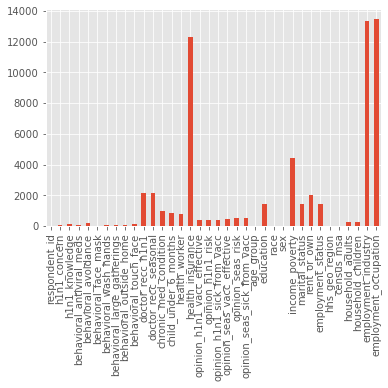


Commad Name is ==> : Check_nulls(DF_N,col_name) ==> Check NULLs ==> 	None


Commad Name is ==> : DF_N[col_name].head() ==> HEAD ==> 
0    55 - 64 Years
1    35 - 44 Years
2    18 - 34 Years
3        65+ Years
4    45 - 54 Years
Name: age_group, dtype: object


Commad Name is ==> : DF_N[col_name].tail() ==> TAIL ==> 
26702        65+ Years
26703    18 - 34 Years
26704    55 - 64 Years
26705    18 - 34 Years
26706        65+ Years
Name: age_group, dtype: object


Commad Name is ==> : DF_N[col_name].keys() ==> KEYS ==> 
RangeIndex(start=0, stop=26707, step=1)


Commad Name is ==> : DF_N[col_name].values ==> VALUES ==> 
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' ... '55 - 64 Years'
 '18 - 34 Years' '65+ Years']


Commad Name is ==> : DF_N[col_name].index ==> INDEX ==> 
RangeIndex(start=0, stop=26707, step=1)


Data Range Constraints for Column ... ==>	age_group


Commad Name is ==> : DESCRIBE ... ==>
count         26707
unique            5
top       65+ Years
freq           6843
Nam

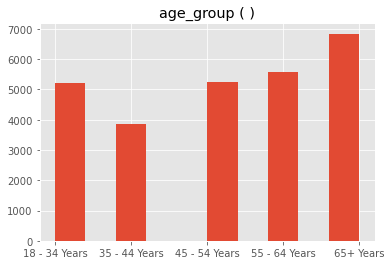


Commad Name is ==> : Check CONSTRAINT  ==> 	None


Commad Name is ==> : Get status of columns ==> COLUMN COUNTS ==>
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64


Commad Name is ==> : Get GROUPBY value counts on DataFrame ==> DF COUNTS ==>
               respondent_id  h1n1_concern  h1n1_knowledge  \
age_group                                                    
18 - 34 Years           5215          5211            5206   
35 - 44 Years           3848          3842            3838   
45 - 54 Years           5238          5231            5226   
55 - 64 Years           5563          5546            5536   
65+ Years               6843          6785            6785   

               behavioral_antiviral_meds  behavioral_avoidance  \
age_group                                                        
18 - 34 Years                       5205                  5201   
35 - 44 Years                  

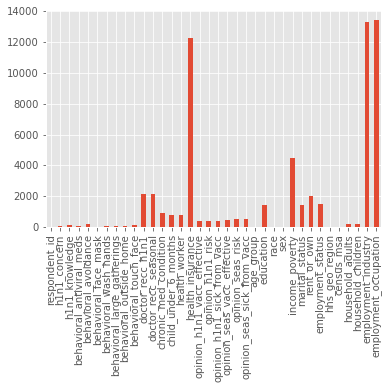


Commad Name is ==> : Check_nulls(DF_N,col_name) ==> Check NULLs ==> 	None


Commad Name is ==> : DF_N[col_name].head() ==> HEAD ==> 
0    35 - 44 Years
1    18 - 34 Years
2    55 - 64 Years
3        65+ Years
4    35 - 44 Years
Name: age_group, dtype: object


Commad Name is ==> : DF_N[col_name].tail() ==> TAIL ==> 
26703    35 - 44 Years
26704    18 - 34 Years
26705    18 - 34 Years
26706    55 - 64 Years
26707    45 - 54 Years
Name: age_group, dtype: object


Commad Name is ==> : DF_N[col_name].keys() ==> KEYS ==> 
RangeIndex(start=0, stop=26708, step=1)


Commad Name is ==> : DF_N[col_name].values ==> VALUES ==> 
['35 - 44 Years' '18 - 34 Years' '55 - 64 Years' ... '18 - 34 Years'
 '55 - 64 Years' '45 - 54 Years']


Commad Name is ==> : DF_N[col_name].index ==> INDEX ==> 
RangeIndex(start=0, stop=26708, step=1)


Data Range Constraints for Column ... ==>	age_group


Commad Name is ==> : DESCRIBE ... ==>
count         26708
unique            5
top       65+ Years
freq           6718

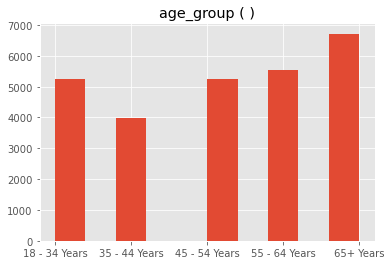


Commad Name is ==> : Check CONSTRAINT  ==> 	None


Commad Name is ==> : Get status of columns ==> COLUMN COUNTS ==>
65+ Years        6718
55 - 64 Years    5529
45 - 54 Years    5257
18 - 34 Years    5234
35 - 44 Years    3970
Name: age_group, dtype: int64


Commad Name is ==> : Get GROUPBY value counts on DataFrame ==> DF COUNTS ==>
               respondent_id  h1n1_concern  h1n1_knowledge  \
age_group                                                    
18 - 34 Years           5234          5230            5222   
35 - 44 Years           3970          3967            3956   
45 - 54 Years           5257          5250            5243   
55 - 64 Years           5529          5509            5504   
65+ Years               6718          6667            6661   

               behavioral_antiviral_meds  behavioral_avoidance  \
age_group                                                        
18 - 34 Years                       5221                  5209   
35 - 44 Years                  

In [34]:
print('\n**********Review_Text(df,"age_group")**********\n')
Review_Text(df,"age_group")

print('\n**********Review_Text(dfTest_Fea,"age_group")**********\n')
Review_Text(dfTest_Fea,"age_group")

### Convert Selected OBJECTs &/or Numeric to type as categorical

In [35]:
# Convert OBJECTs to type as categorical
 
def Convert_to_categoricalastype(DF_N, col_name) :
    """
    # Syntax for Numeric_or_categorical is : 

    # It may OVER WRITE the original Data. 
    #    To AVOID REMOVE assignmet 'DF_N[col_name] =' 

    # DF_N = Data Frame & col_name = cloumn name & 'category' data type'
    
    """
    
    DF_N = DF_N
    col_name = col_name

    # Print describe col_name column ==>
    
    print("***** Converting to Categorial - Column Name ==> \t{}\n".format(col_name))
    pprint(DF_N[col_name].dtypes, "DTYPES ==> Before\t")
    pprint(DF_N[col_name].unique(), "UNIQUE ==> Before\n")
    pprint(DF_N[col_name].describe(), "DESCRIBE ==> Before\n")
    
    # Convert to categoricalastype('category') ==> 
    
    DF_N[col_name] = DF_N[col_name].astype('category')

    # Print describe col_name column ==>

    print("***** Converted to Categorial - Column Name ==> \t{}\n".format(col_name))
    pprint(DF_N[col_name].dtypes, "DTYPES ==> After\t")
    pprint(DF_N[col_name].unique(), "UNIQUE ==> After\n")
    pprint(DF_N[col_name].describe(), "DESCRIBE ==> After\n")


#    Review_Text(DF_N, col_name)
    
    return()
    


## Convert_ALL_Listed_to_Catagorical
    based on provided List of Object & Numeric Columns

In [36]:
# Convert_to_categoricalastype All Listed Columns

# CONVERT ALL Listedto CATAGORICAL

def Convert_ALL_Listed_to_Catagorical (DF_N , C_List_CAT) :

    """
    df = Convert_ALL_Listed_to_Catagorical (df , C_List_CAT)
    """

    DF_N = DF_N

    C_List_CAT = C_List_CAT

    for i in C_List_CAT :
        # print("\t{} ... Converting ... ".format(i))
        Convert_to_categoricalastype (DF_N , i)
        # print("\t{} ... DONE".format(i))

    print("\n***** Conversion Completed ... INFO ==> \n{}".format(DF_N.info()))

#    print("\nReview Nulls ==> \n{}".format(review_nulls(DF_N)))

    return(DF_N)


## Full Review of Numeric Columns
    
    Review_Column_Num (Numeric)
    Check Data_range_constraints
    Check_Range
    Check_outliers
    Check Status_of_Columns
    Check_Duplicate_values_short
       

In [37]:


def Full_Review_of_Num_Cols (DF_N, col_name, m, rf=0, rt=5)  :
    
    """
    example:
    
    Full_Review_of_Cols (df, 'h1n1_concern', "mode" , 0, 3) 
    
    
    DF_N = DF_N Data Frame
    col_name = col_name Column Name
    m = Method = "mode" or "mean" for Testing of Nulls removal
    rf = range from 
    rt = range to
    """
    
    DF_N = DF_N
    col_name = col_name
    m  = m
    rf = rf
    rt = rt
    
    print("\nReview_Column_Num ...\n")
    Review_Column_Num(DF_N, col_name, m)

    print("\nData_range_constraints ...\n")
    Data_range_constraints(DF_N, col_name)

    print("\nCheck_Range ...\n")
    Check_Range(DF_N, col_name, rf, rt)

    print("\nCheck_outliers ...\n")
    Check_outliers(DF_N[col_name]) 

    print("\nStatus_of_Columns ...\n")    
    Status_of_Columns(DF_N, col_name)

    print("\nCheck_Duplicate_values_short ...\n")
    Check_Duplicate_values_short(DF_N)     
    


## A Full Review of ALL Numeric Columns is done


### Note: we will be Testing, Exploring, Cleaning & Manipulating both files

    df          =  df1n  =  "training_set_features"

    dfTest_Fea  =  df3n  =  "test_set_features"

Note: Only one column output is shown here & for other columns the code has been commented to keep the size of this file small



**********Full_Review_of_Num_Cols (df, "h1n1_concern", "mode" , 0, 3)
**********

Review_Column_Num ...


REVIEW COLUMN NUM ==> 	h1n1_concern

Commad Name is ==> : DF_N.shape - SHAPE ==>	(26707, 36)


Commad Name is ==> : DF_N[col_name].count() - COUNT	26615


Commad Name is ==> : DF_N[col_name].isna().any() - ANY NULLs ==>	True


Commad Name is ==> : DF_N[col_name].isna().sum() - SUM NULLs ==>	92


Commad Name is ==> : DF_N[col_name].min() - Value MIN ==> 	0.0


Commad Name is ==> : DF_N[col_name].max() - Value MAX ==> 	3.0


Commad Name is ==> : DF_N[col_name].describe() - DESCRIBE ==> 
count    26615.000000
mean         1.618486
std          0.910311
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: h1n1_concern, dtype: float64


Commad Name is ==> : Check_outliers(DF_N[col_name]) - OUTLIERS ==>

plot



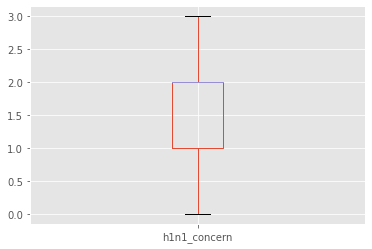


METHOD is MODE Value ==> 	2.0


Commad Name is ==> : col_imputed[col_name].isna().any() - 
Remaining NULLs after relacement Test - Any ==> 	False


Commad Name is ==> : col_imputed[col_name].isna().sum() - 
Remaining NULLs after relacement Test - Sum ==> 	0


Assert Note: No error message means it passed the test
Check Assert Error ... if yes, then Resolve else Continue ...


Commad Name is ==> : col_imputed[col_name].describe() ==> 
DESCRIBE after Nulls replacement Test RESULTs ==> 
count    26707.000000
mean         1.619800
std          0.909016
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: h1n1_concern, dtype: float64


Data_range_constraints ...


Data Range Constraints for Column ... ==>	h1n1_concern


Commad Name is ==> : DESCRIBE ... ==>
count    26615.000000
mean         1.618486
std          0.910311
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.0000

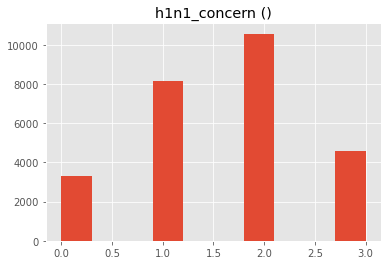


Check_Range ...


CHECK RANGE for Column Name ==>	h1n1_concern 


Commad Name is ==> : DF_N[col_name].max() - value is MAX  ==>	3.0


Commad Name is ==> : DF_N[col_name].min() - value is MIN ==>	0.0

the parameters provided are a == 0 & b == 3

Assert Note: No error message means it passed the test
Check Assert Error ... if yes, then Resolve else Continue ...


Commad Name is ==> : d = DF_N[DF_N[col_name] > b ] - Check Greater Then b ==>	0


Commad Name is ==> : d = DF_N[DF_N[col_name] < a ] - Check Less Then a ==>	0


Commad Name is ==> : d = DF_N[DF_N[col_name] <= b ]  - Check Less Then Equal to b ==>	26615


Commad Name is ==> : d = DF_N[DF_N[col_name] >= a ]  - Check Greater Then Equal to a ==>	26615


Check_outliers ...



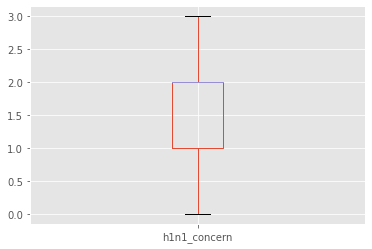


Status_of_Columns ...


Commad Name is ==> : Get status of columns ==> COLUMN COUNTS ==>
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64


Commad Name is ==> : Get GROUPBY value counts on DataFrame ==> DF COUNTS ==>
              respondent_id  h1n1_knowledge  behavioral_antiviral_meds  \
h1n1_concern                                                             
0.0                    3296            3268                       3289   
1.0                    8153            8125                       8133   
2.0                   10575           10546                      10558   
3.0                    4591            4570                       4569   

              behavioral_avoidance  behavioral_face_mask  \
h1n1_concern                                               
0.0                           3248                  3293   
1.0                           8095                  8148   
2.0                          10510                 10574   
3

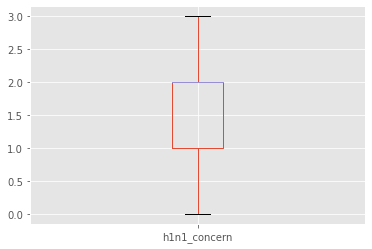


METHOD is MODE Value ==> 	2.0


Commad Name is ==> : col_imputed[col_name].isna().any() - 
Remaining NULLs after relacement Test - Any ==> 	False


Commad Name is ==> : col_imputed[col_name].isna().sum() - 
Remaining NULLs after relacement Test - Sum ==> 	0


Assert Note: No error message means it passed the test
Check Assert Error ... if yes, then Resolve else Continue ...


Commad Name is ==> : col_imputed[col_name].describe() ==> 
DESCRIBE after Nulls replacement Test RESULTs ==> 
count    26708.000000
mean         1.624345
std          0.901567
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: h1n1_concern, dtype: float64


Data_range_constraints ...


Data Range Constraints for Column ... ==>	h1n1_concern


Commad Name is ==> : DESCRIBE ... ==>
count    26623.000000
mean         1.623145
std          0.902755
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.0000

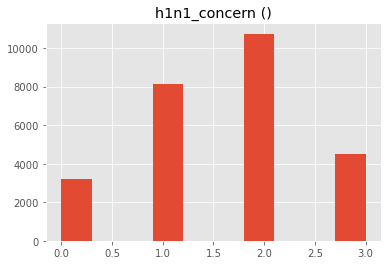


Check_Range ...


CHECK RANGE for Column Name ==>	h1n1_concern 


Commad Name is ==> : DF_N[col_name].max() - value is MAX  ==>	3.0


Commad Name is ==> : DF_N[col_name].min() - value is MIN ==>	0.0

the parameters provided are a == 0 & b == 3

Assert Note: No error message means it passed the test
Check Assert Error ... if yes, then Resolve else Continue ...


Commad Name is ==> : d = DF_N[DF_N[col_name] > b ] - Check Greater Then b ==>	0


Commad Name is ==> : d = DF_N[DF_N[col_name] < a ] - Check Less Then a ==>	0


Commad Name is ==> : d = DF_N[DF_N[col_name] <= b ]  - Check Less Then Equal to b ==>	26623


Commad Name is ==> : d = DF_N[DF_N[col_name] >= a ]  - Check Greater Then Equal to a ==>	26623


Check_outliers ...



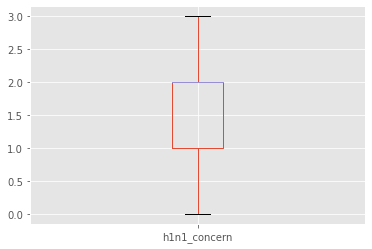


Status_of_Columns ...


Commad Name is ==> : Get status of columns ==> COLUMN COUNTS ==>
2.0    10743
1.0     8158
3.0     4523
0.0     3199
Name: h1n1_concern, dtype: int64


Commad Name is ==> : Get GROUPBY value counts on DataFrame ==> DF COUNTS ==>
              respondent_id  h1n1_knowledge  behavioral_antiviral_meds  \
h1n1_concern                                                             
0.0                    3199            3174                       3187   
1.0                    8158            8123                       8142   
2.0                   10743           10710                      10724   
3.0                    4523            4502                       4491   

              behavioral_avoidance  behavioral_face_mask  \
h1n1_concern                                               
0.0                           3157                  3197   
1.0                           8101                  8154   
2.0                          10668                 10735   
3

In [38]:
print('\n**********Full_Review_of_Num_Cols (df, "h1n1_concern", "mode" , 0, 3)\n**********')
Full_Review_of_Num_Cols (df, "h1n1_concern", "mode" , 0, 3)

print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "h1n1_concern", "mode" , 0, 3)**********\n')
Full_Review_of_Num_Cols (dfTest_Fea, "h1n1_concern", "mode" , 0, 3)

In [39]:
# print('\n**********Full_Review_of_Num_Cols (df, "h1n1_knowledge", "mode" , 0, 2)\n**********')
# Full_Review_of_Num_Cols (df, "h1n1_knowledge", "mode" , 0, 2)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "h1n1_knowledge", "mode" , 0, 2)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "h1n1_knowledge", "mode" , 0, 2)


In [40]:
# print('\n**********Full_Review_of_Num_Cols (df, "behavioral_antiviral_meds", "mode" , 0, 1)\n**********')
# Full_Review_of_Num_Cols (df, "behavioral_antiviral_meds", "mode" , 0, 1)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "behavioral_antiviral_meds", "mode" , 0, 1)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "behavioral_antiviral_meds", "mode" , 0, 1)


In [41]:
# print('\n**********Full_Review_of_Num_Cols (df, "behavioral_avoidance", "mode" , 0, 1)\n**********')
# Full_Review_of_Num_Cols (df, "behavioral_avoidance", "mode" , 0, 1)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "behavioral_avoidance", "mode" , 0, 1)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "behavioral_avoidance", "mode" , 0, 1)


In [42]:
# print('\n**********Full_Review_of_Num_Cols (df, "behavioral_face_mask", "mode" , 0, 1)\n**********')
# Full_Review_of_Num_Cols (df, "behavioral_face_mask", "mode" , 0, 1)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "behavioral_face_mask", "mode" , 0, 1)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "behavioral_face_mask", "mode" , 0, 1)


In [43]:
# print('\n**********Full_Review_of_Num_Cols (df, "behavioral_wash_hands", "mode" , 0, 1)\n**********')
# Full_Review_of_Num_Cols (df, "behavioral_wash_hands", "mode" , 0, 1)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "behavioral_wash_hands", "mode" , 0, 1)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "behavioral_wash_hands", "mode" , 0, 1)


In [44]:
# print('\n**********Full_Review_of_Num_Cols (df, "behavioral_large_gatherings", "mode" , 0, 1)\n**********')
# Full_Review_of_Num_Cols (df, "behavioral_large_gatherings", "mode" , 0, 1)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "behavioral_large_gatherings", "mode" , 0, 1)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "behavioral_large_gatherings", "mode" , 0, 1)


In [45]:
# print('\n**********Full_Review_of_Num_Cols (df, "behavioral_outside_home", "mode" , 0, 1)\n**********')
# Full_Review_of_Num_Cols (df, "behavioral_outside_home", "mode" , 0, 1)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "behavioral_outside_home", "mode" , 0, 1)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "behavioral_outside_home", "mode" , 0, 1)


In [46]:
# print('\n**********Full_Review_of_Num_Cols (df, "behavioral_touch_face", "mode" , 0, 1)\n**********')
# Full_Review_of_Num_Cols (df, "behavioral_touch_face", "mode" , 0, 1)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "behavioral_touch_face", "mode" , 0, 1)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "behavioral_touch_face", "mode" , 0, 1)


In [47]:
# print('\n**********Full_Review_of_Num_Cols (df, "doctor_recc_h1n1", "mode" , 0, 1)\n**********')
# Full_Review_of_Num_Cols (df, "doctor_recc_h1n1", "mode" , 0, 1)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "doctor_recc_h1n1", "mode" , 0, 1)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "doctor_recc_h1n1", "mode" , 0, 1)


In [48]:
# print('\n**********Full_Review_of_Num_Cols (df, "doctor_recc_seasonal", "mode" , 0, 1)\n**********')
# Full_Review_of_Num_Cols (df, "doctor_recc_seasonal", "mode" , 0, 1)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "doctor_recc_seasonal", "mode" , 0, 1)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "doctor_recc_seasonal", "mode" , 0, 1)


In [49]:
# print('\n**********Full_Review_of_Num_Cols (df, "chronic_med_condition", "mode" , 0, 1)\n**********')
# Full_Review_of_Num_Cols (df, "chronic_med_condition", "mode" , 0, 1)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "chronic_med_condition", "mode" , 0, 1)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "chronic_med_condition", "mode" , 0, 1)


In [50]:
# print('\n**********Full_Review_of_Num_Cols (df, "child_under_6_months", "mode" , 0, 1)\n**********')
# Full_Review_of_Num_Cols (df, "child_under_6_months", "mode" , 0, 1)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "child_under_6_months", "mode" , 0, 1)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "child_under_6_months", "mode" , 0, 1)


In [51]:
# print('\n**********Full_Review_of_Num_Cols (df, "health_worker", "mode" , 0, 1)\n**********')
# Full_Review_of_Num_Cols (df, "health_worker", "mode" , 0, 1)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "health_worker", "mode" , 0, 1)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "health_worker", "mode" , 0, 1)


In [52]:
# print('\n**********Full_Review_of_Num_Cols (df, "health_insurance", "mode" , 0, 1)\n**********')
# Full_Review_of_Num_Cols (df, "health_insurance", "mode" , 0, 1)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "health_insurance", "mode" , 0, 1)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "health_insurance", "mode" , 0, 1)


In [53]:
# print('\n**********Full_Review_of_Num_Cols (df, "opinion_h1n1_vacc_effective", "mode" , 0, 5)\n**********')
# Full_Review_of_Num_Cols (df, "opinion_h1n1_vacc_effective", "mode" , 0, 5)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "opinion_h1n1_vacc_effective", "mode" , 0, 5)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "opinion_h1n1_vacc_effective", "mode" , 0, 5)


In [54]:
# print('\n**********Full_Review_of_Num_Cols (df, "opinion_h1n1_risk", "mode" , 0, 5)\n**********')
# Full_Review_of_Num_Cols (df, "opinion_h1n1_risk", "mode" , 0, 5)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "opinion_h1n1_risk", "mode" , 0, 5)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "opinion_h1n1_risk", "mode" , 0, 5)


In [55]:
# print('\n**********Full_Review_of_Num_Cols (df, "opinion_h1n1_sick_from_vacc", "mode" , 0, 5)\n**********')
# Full_Review_of_Num_Cols (df, "opinion_h1n1_sick_from_vacc", "mode" , 0, 5)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "opinion_h1n1_sick_from_vacc", "mode" , 0, 5)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "opinion_h1n1_sick_from_vacc", "mode" , 0, 5)


In [56]:
# print('\n**********Full_Review_of_Num_Cols (df, "opinion_seas_vacc_effective", "mode" , 0, 5)\n**********')
# Full_Review_of_Num_Cols (df, "opinion_seas_vacc_effective", "mode" , 0, 5)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "opinion_seas_vacc_effective", "mode" , 0, 5)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "opinion_seas_vacc_effective", "mode" , 0, 5)


In [57]:
# print('\n**********Full_Review_of_Num_Cols (df, "opinion_seas_risk", "mode" , 0, 5)\n**********')
# Full_Review_of_Num_Cols (df, "opinion_seas_risk", "mode" , 0, 5)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "opinion_seas_risk", "mode" , 0, 5)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "opinion_seas_risk", "mode" , 0, 5)


In [58]:
# print('\n**********Full_Review_of_Num_Cols (df, "opinion_seas_sick_from_vacc", "mode" , 0, 5)\n**********')
# Full_Review_of_Num_Cols (df, "opinion_seas_sick_from_vacc", "mode" , 0, 5)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "opinion_seas_sick_from_vacc", "mode" , 0, 5)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "opinion_seas_sick_from_vacc", "mode" , 0, 5)


In [59]:
# print('\n**********Full_Review_of_Num_Cols (df, "household_adults", "mode" , 0, 3)\n**********')
# Full_Review_of_Num_Cols (df, "household_adults", "mode" , 0, 3)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "household_adults", "mode" , 0, 3)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "household_adults", "mode" , 0, 3)


In [60]:
# print('\n**********Full_Review_of_Num_Cols (df, "household_children", "mode" , 0, 3)\n**********')
# Full_Review_of_Num_Cols (df, "household_children", "mode" , 0, 3)

# print('\n**********Full_Review_of_Num_Cols (dfTest_Fea, "household_children", "mode" , 0, 3)**********\n')
# Full_Review_of_Num_Cols (dfTest_Fea, "household_children", "mode" , 0, 3)


## A Full Review of ALL OBJECT (Text) Columns is done

### Note: we will be Testing, Exploring, Cleaning & Manipulating both files

    df          =  df1n  =  "training_set_features"

    dfTest_Fea  =  df3n  =  "test_set_features"

Note: Only one column output is shown here & for other columns the code has been commented to keep the size of this file small



**********Review_Text(df,'age_group')**********


Column name is ==>	age_group


Commad Name is ==> : DF_N[col_name].dtypes ==> DTYPES ==> 	object


Commad Name is ==> : type(DF_N[col_name])==> TYPE ==> 	<class 'pandas.core.series.Series'>


Commad Name is ==> : DF_N[col_name].describe() ==> DESCRIBE ==> 
count         26707
unique            5
top       65+ Years
freq           6843
Name: age_group, dtype: object


Commad Name is ==> : DF_N[col_name].count() ==> COUNT ==> 	26707


Commad Name is ==> : 
DF_N[col_name].unique() ==> UNIQUE ==> 
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']

Checking Nulls >>> 



Commad Name is ==> : DF_N[col_name].isna().any() ==>  ANY NULLs ==>	False


Commad Name is ==> : DF_N[col_name].isna().sum() ==>  SUM NULLs ==>	0



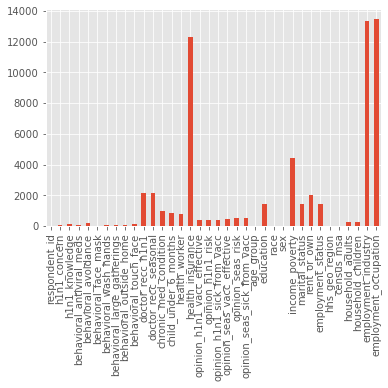


Commad Name is ==> : Check_nulls(DF_N,col_name) ==> Check NULLs ==> 	None


Commad Name is ==> : DF_N[col_name].head() ==> HEAD ==> 
0    55 - 64 Years
1    35 - 44 Years
2    18 - 34 Years
3        65+ Years
4    45 - 54 Years
Name: age_group, dtype: object


Commad Name is ==> : DF_N[col_name].tail() ==> TAIL ==> 
26702        65+ Years
26703    18 - 34 Years
26704    55 - 64 Years
26705    18 - 34 Years
26706        65+ Years
Name: age_group, dtype: object


Commad Name is ==> : DF_N[col_name].keys() ==> KEYS ==> 
RangeIndex(start=0, stop=26707, step=1)


Commad Name is ==> : DF_N[col_name].values ==> VALUES ==> 
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' ... '55 - 64 Years'
 '18 - 34 Years' '65+ Years']


Commad Name is ==> : DF_N[col_name].index ==> INDEX ==> 
RangeIndex(start=0, stop=26707, step=1)


Data Range Constraints for Column ... ==>	age_group


Commad Name is ==> : DESCRIBE ... ==>
count         26707
unique            5
top       65+ Years
freq           6843
Nam

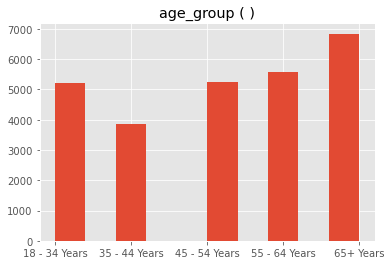


Commad Name is ==> : Check CONSTRAINT  ==> 	None


Commad Name is ==> : Get status of columns ==> COLUMN COUNTS ==>
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64


Commad Name is ==> : Get GROUPBY value counts on DataFrame ==> DF COUNTS ==>
               respondent_id  h1n1_concern  h1n1_knowledge  \
age_group                                                    
18 - 34 Years           5215          5211            5206   
35 - 44 Years           3848          3842            3838   
45 - 54 Years           5238          5231            5226   
55 - 64 Years           5563          5546            5536   
65+ Years               6843          6785            6785   

               behavioral_antiviral_meds  behavioral_avoidance  \
age_group                                                        
18 - 34 Years                       5205                  5201   
35 - 44 Years                  

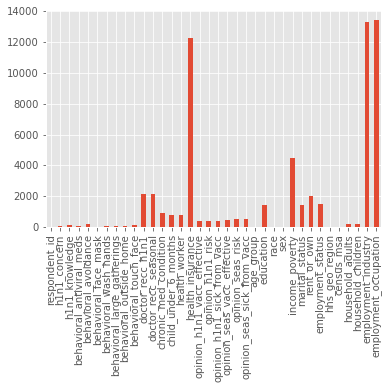


Commad Name is ==> : Check_nulls(DF_N,col_name) ==> Check NULLs ==> 	None


Commad Name is ==> : DF_N[col_name].head() ==> HEAD ==> 
0    35 - 44 Years
1    18 - 34 Years
2    55 - 64 Years
3        65+ Years
4    35 - 44 Years
Name: age_group, dtype: object


Commad Name is ==> : DF_N[col_name].tail() ==> TAIL ==> 
26703    35 - 44 Years
26704    18 - 34 Years
26705    18 - 34 Years
26706    55 - 64 Years
26707    45 - 54 Years
Name: age_group, dtype: object


Commad Name is ==> : DF_N[col_name].keys() ==> KEYS ==> 
RangeIndex(start=0, stop=26708, step=1)


Commad Name is ==> : DF_N[col_name].values ==> VALUES ==> 
['35 - 44 Years' '18 - 34 Years' '55 - 64 Years' ... '18 - 34 Years'
 '55 - 64 Years' '45 - 54 Years']


Commad Name is ==> : DF_N[col_name].index ==> INDEX ==> 
RangeIndex(start=0, stop=26708, step=1)


Data Range Constraints for Column ... ==>	age_group


Commad Name is ==> : DESCRIBE ... ==>
count         26708
unique            5
top       65+ Years
freq           6718

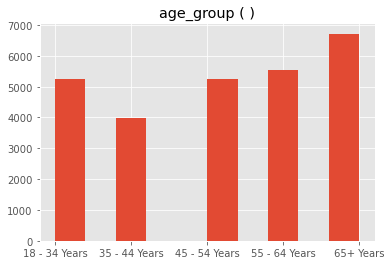


Commad Name is ==> : Check CONSTRAINT  ==> 	None


Commad Name is ==> : Get status of columns ==> COLUMN COUNTS ==>
65+ Years        6718
55 - 64 Years    5529
45 - 54 Years    5257
18 - 34 Years    5234
35 - 44 Years    3970
Name: age_group, dtype: int64


Commad Name is ==> : Get GROUPBY value counts on DataFrame ==> DF COUNTS ==>
               respondent_id  h1n1_concern  h1n1_knowledge  \
age_group                                                    
18 - 34 Years           5234          5230            5222   
35 - 44 Years           3970          3967            3956   
45 - 54 Years           5257          5250            5243   
55 - 64 Years           5529          5509            5504   
65+ Years               6718          6667            6661   

               behavioral_antiviral_meds  behavioral_avoidance  \
age_group                                                        
18 - 34 Years                       5221                  5209   
35 - 44 Years                  

In [61]:
print("\n**********Review_Text(df,'age_group')**********\n")
Review_Text(df,'age_group')


print("\n**********Review_Text(dfTest_Fea,'age_group')**********\n")
Review_Text(dfTest_Fea,'age_group')

In [62]:
# print("\n**********Review_Text(df,'education')**********\n")
# Review_Text(df,'education')


# print("\n**********Review_Text(dfTest_Fea,'education')**********\n")
# Review_Text(dfTest_Fea,'education')


In [63]:
# print("\n**********Review_Text(df,'race')**********\n")
# Review_Text(df,'race')


# print("\n**********Review_Text(dfTest_Fea,'race')**********\n")
# Review_Text(dfTest_Fea,'race')

In [64]:
# print("\n**********Review_Text(df,'sex')**********\n")
# Review_Text(df,'sex')


# print("\n**********Review_Text(dfTest_Fea,'sex')**********\n")
# Review_Text(dfTest_Fea,'sex')


In [65]:
# print("\n**********Review_Text(df,'income_poverty')**********\n")
# Review_Text(df,'income_poverty')


# print("\n**********Review_Text(dfTest_Fea,'income_poverty')**********\n")
# Review_Text(dfTest_Fea,'income_poverty')


In [66]:
# print("\n**********Review_Text(df,'marital_status')**********\n")
# Review_Text(df,'marital_status')


# print("\n**********Review_Text(dfTest_Fea,'marital_status')**********\n")
# Review_Text(dfTest_Fea,'marital_status')


In [67]:
# print("\n**********Review_Text(df,'rent_or_own')**********\n")
# Review_Text(df,'rent_or_own')


# print("\n**********Review_Text(dfTest_Fea,'rent_or_own')**********\n")
# Review_Text(dfTest_Fea,'rent_or_own')


In [68]:
# print("\n**********Review_Text(df,'employment_status')**********\n")
# Review_Text(df,'employment_status')


# print("\n**********Review_Text(dfTest_Fea,'employment_status')**********\n")
# Review_Text(dfTest_Fea,'employment_status')


In [69]:
# print("\n**********Review_Text(df,'hhs_geo_region')**********\n")
# Review_Text(df,'hhs_geo_region')


# print("\n**********Review_Text(dfTest_Fea,'hhs_geo_region')**********\n")
# Review_Text(dfTest_Fea,'hhs_geo_region')


In [70]:
# print("\n**********Review_Text(df,'census_msa')**********\n")
# Review_Text(df,'census_msa')


# print("\n**********Review_Text(dfTest_Fea,'census_msa')**********\n")
# Review_Text(dfTest_Fea,'census_msa')


In [71]:
# print("\n**********Review_Text(df,'employment_industry')**********\n")
# Review_Text(df,'employment_industry')


# print("\n**********Review_Text(dfTest_Fea,'employment_industry')**********\n")
# Review_Text(dfTest_Fea,'employment_industry')


In [72]:
# print("\n**********Review_Text(df,'employment_occupation')**********\n")
# Review_Text(df,'employment_occupation')


# print("\n**********Review_Text(dfTest_Fea,'employment_occupation')**********\n")
# Review_Text(dfTest_Fea,'employment_occupation')


## Dealing with categorical features

### Defining Function for Encoding dummy variables

This is required to convert the Categorical Variables to Numeric

Note:    

         * USE THIS ONLY AFTER NULLs have been REMOVED &

         * OBJs CONVERTED to CATAGORICALs


In [73]:
# Dealing with categorical features
# Encoding dummy variables


def Encoding_dummy_variables(DF_N) :
    
    """
    Example:

    DF_N_enc = Encoding_dummy_variables(DF_N)
    or
    DF_N_enc = Encoding_dummy_variables(DF_N[C_List_Cat])
    
    # USE THIS ONLY AFTER NULLs have been REMOVED & 
    # OBJs CONVERTED to CATAGORICALs

    """

    import pandas as pd

    df_sel = DF_N

    DF_N_enc = pd.get_dummies(df_sel)


    # Remove redundant variables - Not done at the moment
    # In future implement the drop for Extra columns created by Encoding 
    # DF_N_enc = DF_N_enc.drop('origin_Asia', axis=1)


    print("\nDf_Encoded ==> \n".format(DF_N_enc.info()))

    return(DF_N_enc)

## SUPERVISED LEARNING WITH SCIKIT-LEARN

### Linear regression 

### Define function to calculate Ridge Score

In [74]:
# SUPERVISED LEARNING WITH SCIKIT-LEARN

# Linear regression 

# using dummy variables

def Ridge_Score(DF_N_enc,DF_y) :

    """
    Example:

    Ridge_Score(df_enc,  df2["h1n1_vaccine"])

    X = DF_N_enc
    y = DF_y["h1n1_vaccine"]
    """

    X = DF_N_enc
    y = DF_y

    # import libraries
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import Ridge


    # Split the dataset into Test & Train X & y
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.3, random_state=1)
    
    # initiate ridge model & fit it
    ridge = Ridge(alpha=0.5, normalize=True).fit(X_train,
    y_train)
    
    # Calculate Ridge Score
    print("\nRidge Score ==> \t {}\n".format(ridge.score(X_test, y_test)))

## Define function to use SimpleImputer

### This is used to remove Nulls

    The strategy used here is 'most_frequent'
    Reason is becuase values in data are whole numbers (integers)
    If 'mean' was used then it could come in decimal point (float) which is not appropriate for this case

In [75]:
# use SimpleImputer 


# Example

#  X = use_SimpleImputer(DF_N_enc)

def use_SimpleImputer(DF_N_enc) :

    """
    # Example

    #  X = use_SimpleImputer(DF_N_enc)


    """
    
    X = DF_N_enc


    # from sklearn.preprocessing import Imputer

    # imp = Imputer(missing_values='NaN', strategy= 'most_frequent' or 'median' or 'mean', axis=0)
    # Imputer is giving error therefore using SimpleImputer
    
    
    from sklearn.impute import SimpleImputer
    
    imp = SimpleImputer( strategy='most_frequent')


    imp.fit(X)

    X = imp.transform(X)
    
    print("\nuse_SimpleImputer ... Done")
    
    return(X)

## Import Sklearn

### All of the imported modules may not be required.
### This will be fine tuned later

In [76]:
# Import Sklearn

def Import_Sklearn() :

    from sklearn.linear_model import Ridge
    from sklearn.impute import SimpleImputer

    from sklearn.preprocessing import scale
    from sklearn.preprocessing import StandardScaler

    from sklearn.model_selection import train_test_split

    from sklearn.linear_model import Lasso
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import cross_val_score
    
    from sklearn.neighbors import KNeighborsClassifier

    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    
    
    #    from sklearn.preprocessing import Imputer
    #    from sklearn.pipeline import Pipeline
    #    from sklearn.model_selection import GridSearchCV
    
    print("\nSklearn Imported ...\n")
    
# All of the imported modules may not be required.
# This will be fine tuned later
 


## Scaling in scikit-learn

### Scaling is required to bring closer the data range of various variables
### This is important before doing regression analysis

In [77]:
# Scaling in scikit-learn
# X = DF_N_enc[S_list1]

# X_scaled = Scaling_in_scikit_learn(DF_N_enc[S_list1])

def Scaling_in_scikit_learn(DF_N_enc) :

    from sklearn.preprocessing import scale
    
    X = DF_N_enc

    print("\nMean X ==>\n{}\n\nStd X ==>\n{}\n".format(np.mean(X), np.std(X)))

    X_scaled = scale(X)
   
    print("\nMean X_Scalled ==>\n{}\n\nStd X_Scalled ==>\n{}\n".format(np.mean(X_scaled), np.std(X_scaled)))
    
    return (X_scaled)


## Define function for Spot Checking of Algorithms

### Evaluate various regression models

    'LR_liblinear' = LogisticRegression(solver='liblinear', multi_class='ovr')
    'LR_saga'      =  LogisticRegression(solver='saga', multi_class='auto')
    'LDA'          =  LinearDiscriminantAnalysis()
    'KNN'          =  KNeighborsClassifier()
    'CART'         =  DecisionTreeClassifier()
    'NB'           =  GaussianNB()
    'SVM'          =  SVC(gamma='auto')


In [78]:
# Spot Check Algorithms

def Spot_Check_Algorithms(DF_X, DF_Y) :
    
    # import libraries
    from sklearn.linear_model import LogisticRegression
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import train_test_split
    
    
    print("\nSpot Check Algorithms ==>")
#    print(type(DF_X))
#    print(type(DF_Y))
    
    # Assign parameters to variables
    arrayX = DF_X
    
    # use values to assign y dataframe
    arrayY = DF_Y.values
       
#    print(type(arrayX))
#    print(type(arrayY))
    
    X = arrayX
    y = arrayY

    # Split the test & train for X & y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#    print("\nDone\n")


    # Assign multiple models
    models = []
    
    models.append(('LR_liblinear', LogisticRegression(solver='liblinear', multi_class='ovr')))

    models.append(('LR_saga', LogisticRegression(solver='saga', multi_class='auto')))
 
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))

    models.append(('SVM', SVC(gamma='auto')))

    # print("\nSVM ommented out because it is taking long time\n")

    print("\nevaluate each model in turn\n")
    
    # evaluate each model in turn
    results = []
    names = []

    for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

#    print("\nDone ...")
    
    # Select Best Model

    # A useful way to compare the samples of results for each algorithm is to create a box and whisker plot for each distribution and compare the distributions.

    print("\nSelect Best Model ... Compare Algorithms ==>")

    # Compare Algorithms
    plt.boxplot(results, labels=names)
    plt.title('Algorithm Comparison')
    plt.show()

#    print("\nDone ...\n")

    
    # Make Predictions

    # Make predictions on validation dataset
    
    print("\nMake predictions based on model named ==> LR_liblinear")

    # model = SVC(gamma='auto')

    model = LogisticRegression(solver='liblinear', multi_class='ovr')

    # model = LinearDiscriminantAnalysis()

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

#    print("\nDone\n")
    
    
    # Evaluate Predictions

    print("\nEvaluate predictions")
    print("\naccuracy_score ==> \t{}".format(accuracy_score(y_test, predictions)))
    print("\nconfusion_matrix ==> \n{}".format(confusion_matrix(y_test, predictions)))
    print("\nclassification_report ==>\n{}".format(classification_report(y_test, predictions)))

#    print("\nDone\n")

## Define function for Lasso 

### It is used to identify features which have most influence on the prediction

In [79]:
# Lasso for feature selection in scikit-learn
# example
#        Lasso(X_scaled, df2["h1n1_vaccine"], S_list)

#    X = X_scaled
#    y = df2["h1n1_vaccine"]


def Lasso(X_scaled, DF_y, S_list) :

    X = X_scaled
    y = DF_y
    S_list = S_list


    from sklearn.linear_model import Lasso

    names = S_list

    lasso = Lasso(alpha=0.1)
    lasso_coef = lasso.fit(X, y).coef_
    _ = plt.plot(range(len(names)), lasso_coef)
    _ = plt.xticks(range(len(names)), names, rotation=60)
    _ = plt.ylabel('Coefficients')
    plt.show()
    


## Define functions for Logistic regression 
## & the ROC curve & Plot Graph

In [80]:
# Logistic regression and the ROC curve

# Logistic regression in scikit-learn

#    X = X_scaled
#    y = df2["h1n1_vaccine"]

# Example:
#     Logistic_regression_ROC_curve(X_scaled, df2["h1n1_vaccine"])

def Logistic_regression_ROC_curve(X_scaled, DF_y, filename, model_name="") :

    # Assign Datasets & Parameters
    X = X_scaled
    y = DF_y
    filename = filename
    model_name = model_name


    # import Libraries
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split

    # Assign model for Regression
    logreg = LogisticRegression()

    # Split Dataset for Train & Test for X & y
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.4, random_state=1)

    # Fit the model
    logreg.fit(X_train, y_train)
    
    if model_name != ""  :

        import pickle

        # save the model to disk

        Full_modelname = filePath + model_name + '.sav'
        pickle.dump(logreg, open(Full_modelname, 'wb'))
        print("\nWritten Model name ==>\t{}".format(Full_modelname))
    
    # Predict y 
    y_pred = logreg.predict(X_test)
    
    # Predict Propabilites for y
    y_pred_prob = logreg.predict_proba(X_test)[:,1]
    
    # Convert Probabilites to DataFrame & Round them to 1 decimal place
    df_y_pred_prob = pd.DataFrame(y_pred_prob, columns=[filename])
    df_y_pred_prob = df_y_pred_prob.round(1)
    
    # Save the Probabilites to disk
    Full_filename = "df_y_pred_prob_" + filename
    writeCsv(df_y_pred_prob, Full_filename)

    Plotting_the_ROC_curve(X, y)
    


In [81]:
# Plotting the ROC curve

def Plotting_the_ROC_curve(X_scaled, DF_y) :
    
    # import Libraries
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_curve
    
    # Assign Datasets & Parameters
    X = X_scaled
    y = DF_y

    # Assign model for Regression
    logreg = LogisticRegression()

    # Split Dataset for Train & Test for X & y
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.4, random_state=1)

    # Fit the model
    logreg.fit(X_train, y_train)
    
    # Predict Propabilites for y
    y_pred_prob = logreg.predict_proba(X_test)[:,1]
    
    # Use roc_curve to calculate fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot the ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')
    plt.show();

    print("\nPredict Probability ==>  \n{}".format(logreg.predict_proba(X_test)[:,1]))
#    print("\ny_pred_prob ==>\n{}\n".format(y_pred_prob))


## Define functions for Calculating  & Displaying
## ROC_AUC Score & Cross Validation Score

In [82]:
# AUC in scikit-learn

# AUC_in_scikit_learn() 


def AUC_in_scikit_learn(X_scaled, DF_y) : 

    # import Libraries
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_auc_score

    # Assign Datasets & Parameters
    X = X_scaled
    y = DF_y
    
    # Assign model for Regression
    logreg = LogisticRegression()
    
    # Split Dataset for Train & Test for X & y
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.4, random_state=1)
    
    # Fit the model
    logreg.fit(X_train, y_train)
    
    # Predict Propabilites for y
    y_pred_prob = logreg.predict_proba(X_test)[:,1]
    
    # Calculate & Display ROC_AUC Score
    print("\nROC_AUC SCORE ==>  \t{}\n".format(roc_auc_score(y_test, y_pred_prob)))

    #    print("\ny_pred_prob ==>\n{}\n".format(y_pred_prob))

In [83]:
# AUC using cross-validation

# AUC_using_cross_validation()

def AUC_using_cross_validation(X_scaled, DF_y) :
    
    # Assign Datasets & Parameters
    X = X_scaled
    y = DF_y

    # import Libraries
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import cross_val_score
    
    # Assign model for Regression
    logreg = LogisticRegression()
    
    # Split Dataset for Train & Test for X & y
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.4, random_state=1)
    
    # Fit the model
    logreg.fit(X_train, y_train)
    
    # Cross Validate & Display the Cross Validation Score for ROC_AUC
    cv_scores = cross_val_score(logreg, X, y, cv=5,
    scoring='roc_auc')
    
    print("\nAUC_CV Score ==> \t{}\n".format(cv_scores))



## Define Funtion to show Confusion matrix & its report



In [86]:
# Confusion matrix in scikit-learn

# example
#        Confusion_matrix_in_scikit_learn(X_scaled, df2["h1n1_vaccine"])

#    X = X_scaled
#    y = df2["h1n1_vaccine"]

def Confusion_matrix_in_scikit_learn (X_scaled, DF_y, modelname='LR' ):

    # Assign Datasets & Parameters
    X = X_scaled
    y = DF_y
    modelname = modelname
    
    # import Libraries
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    
    
    print("Confusion Matrix ... Working ....")
    
    if modelname == "knn" :

        # Assign model for Regression / Classifier
        knn = KNeighborsClassifier(n_neighbors=8)

        # Split Dataset for Train & Test for X & y
        X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=0.4, random_state=1)

        # Fit the model
        knn.fit(X_train, y_train)

        # Predict y
        y_pred = knn.predict(X_test)

    else :
        
        # Assign model for Regression / Classifier
        LR = LogisticRegression()

        # Split Dataset for Train & Test for X & y
        X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=0.4, random_state=1)

        # Fit the model
        LR.fit(X_train, y_train)

        # Predict y
        y_pred = LR.predict(X_test)

   
    # Display Confusion matrix
    print("\nConfusion Matrix ==> \n{}".format(confusion_matrix(y_test, y_pred)))
    
    # Display Classification Report  
    print("Classification Report ==> \n{}".format(classification_report(y_test, y_pred)))
    
    
    

## Removing Nulls form ALL Numeric Columns

In [87]:
print('\n**********Replace_Nulls_in_ALL_NUMERIC_COLs(df, C_List_NUM, "mode")**********\n')
Replace_Nulls_in_ALL_NUMERIC_COLs(df, C_List_NUM, "mode") 


print('\n**********Replace_Nulls_in_ALL_NUMERIC_COLs(dfTest_Fea, C_List_NUM, "mode")**********\n')
Replace_Nulls_in_ALL_NUMERIC_COLs(dfTest_Fea, C_List_NUM, "mode") 


**********Replace_Nulls_in_ALL_NUMERIC_COLs(df, C_List_NUM, "mode")**********


Working on Column Name ==> 	h1n1_concern

Commad Name is ==> : DF_N[col_name].isna().any() ==> NULLs ANY Before	False


Commad Name is ==> : DF_N[col_name].isna().sum() ==> NULLs SUM Before	False


Replacement COLUMN Name ==>	h1n1_concern


FILLNA method is MODE ==>	2.0


Assert Note: No error message means it passed the test
Check Assert Error ... if yes, then Resolve else Continue ...


NULLs REMOVED ...


NULLs REMOVED ...


Commad Name is ==> : DF_N[col_name].isna().any() ==> NULLs ANY After	False


Commad Name is ==> : DF_N[col_name].isna().sum() ==> NULLs SUM After	False

	h1n1_concern ... DONE

Working on Column Name ==> 	h1n1_knowledge

Commad Name is ==> : DF_N[col_name].isna().any() ==> NULLs ANY Before	False


Commad Name is ==> : DF_N[col_name].isna().sum() ==> NULLs SUM Before	False


Replacement COLUMN Name ==>	h1n1_knowledge


FILLNA method is MODE ==>	1.0


Assert Note: No error message mea



NULLs REMOVED ...


NULLs REMOVED ...


Commad Name is ==> : DF_N[col_name].isna().any() ==> NULLs ANY After	False


Commad Name is ==> : DF_N[col_name].isna().sum() ==> NULLs SUM After	False

	health_insurance ... DONE

Working on Column Name ==> 	opinion_h1n1_vacc_effective

Commad Name is ==> : DF_N[col_name].isna().any() ==> NULLs ANY Before	False


Commad Name is ==> : DF_N[col_name].isna().sum() ==> NULLs SUM Before	False


Replacement COLUMN Name ==>	opinion_h1n1_vacc_effective


FILLNA method is MODE ==>	4.0


Assert Note: No error message means it passed the test
Check Assert Error ... if yes, then Resolve else Continue ...


NULLs REMOVED ...


NULLs REMOVED ...


Commad Name is ==> : DF_N[col_name].isna().any() ==> NULLs ANY After	False


Commad Name is ==> : DF_N[col_name].isna().sum() ==> NULLs SUM After	False

	opinion_h1n1_vacc_effective ... DONE

Working on Column Name ==> 	opinion_h1n1_risk

Commad Name is ==> : DF_N[col_name].isna().any() ==> NULLs ANY Before	False




NULLs REMOVED ...


NULLs REMOVED ...


Commad Name is ==> : DF_N[col_name].isna().any() ==> NULLs ANY After	False


Commad Name is ==> : DF_N[col_name].isna().sum() ==> NULLs SUM After	False

	behavioral_face_mask ... DONE

Working on Column Name ==> 	behavioral_wash_hands

Commad Name is ==> : DF_N[col_name].isna().any() ==> NULLs ANY Before	False


Commad Name is ==> : DF_N[col_name].isna().sum() ==> NULLs SUM Before	False


Replacement COLUMN Name ==>	behavioral_wash_hands


FILLNA method is MODE ==>	1.0


Assert Note: No error message means it passed the test
Check Assert Error ... if yes, then Resolve else Continue ...


NULLs REMOVED ...


NULLs REMOVED ...


Commad Name is ==> : DF_N[col_name].isna().any() ==> NULLs ANY After	False


Commad Name is ==> : DF_N[col_name].isna().sum() ==> NULLs SUM After	False

	behavioral_wash_hands ... DONE

Working on Column Name ==> 	behavioral_large_gatherings

Commad Name is ==> : DF_N[col_name].isna().any() ==> NULLs ANY Before	False


Co


NULLs REMOVED ...


Commad Name is ==> : DF_N[col_name].isna().any() ==> NULLs ANY After	False


Commad Name is ==> : DF_N[col_name].isna().sum() ==> NULLs SUM After	False

	opinion_seas_sick_from_vacc ... DONE

Working on Column Name ==> 	household_adults

Commad Name is ==> : DF_N[col_name].isna().any() ==> NULLs ANY Before	False


Commad Name is ==> : DF_N[col_name].isna().sum() ==> NULLs SUM Before	False


Replacement COLUMN Name ==>	household_adults


FILLNA method is MODE ==>	1.0


Assert Note: No error message means it passed the test
Check Assert Error ... if yes, then Resolve else Continue ...


NULLs REMOVED ...


NULLs REMOVED ...


Commad Name is ==> : DF_N[col_name].isna().any() ==> NULLs ANY After	False


Commad Name is ==> : DF_N[col_name].isna().sum() ==> NULLs SUM After	False

	household_adults ... DONE

Working on Column Name ==> 	household_children

Commad Name is ==> : DF_N[col_name].isna().any() ==> NULLs ANY Before	False


Commad Name is ==> : DF_N[col_name].isna

## Removing Nulls form ALL Object (Text) Columns

In [88]:
print('\n**********Replace_Nulls_in_ALL_OBJECT_COLs (df, "ffill")**********\n')
Replace_Nulls_in_ALL_OBJECT_COLs (df, "ffill")  

print('\n**********Replace_Nulls_in_ALL_OBJECT_COLs (dfTest_Fea, "ffill")**********\n')
Replace_Nulls_in_ALL_OBJECT_COLs (dfTest_Fea, "ffill")  


**********Replace_Nulls_in_ALL_OBJECT_COLs (df, "ffill")**********


NULLs REMOVED... Verify 


Commad Name is ==> : Count of Nulls ==> COUNT NULLs ==>
respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                   

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,nduyfdeo,pvmttkik
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,dqpwygqj,"MSA, Principle City",1.0,1.0,xicduogh,xtkaffoo
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,vlluhbov
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,vlluhbov


In [89]:
print('\nAll the Nulls in both the files were removed except two columns in one file "df"')

print('\nFound Nulls in "employment_industry" ANY ==>\t{}'.format(df["employment_industry"].isna().any()))
print('\nFound Nulls in "employment_industry" SUM ==>\t{}'.format(df["employment_industry"].isna().sum()))

print('\nFound Nulls in "employment_occupation" ANY ==>\t{}'.format(df["employment_occupation"].isna().any()))
print('\nFound Nulls in "employment_occupation" SUM ==>\t{}'.format(df["employment_occupation"].isna().sum()))


All the Nulls in both the files were removed except two columns in one file "df"

Found Nulls in "employment_industry" ANY ==>	True

Found Nulls in "employment_industry" SUM ==>	1

Found Nulls in "employment_occupation" ANY ==>	True

Found Nulls in "employment_occupation" SUM ==>	1


# There is still one Null present in each of the following two features:
    employment_industry & employment_occupation
    Therefore we will have to also use "bfill"
    Note: it is rquired in only one file (df) & not in other (defTest_Fea)

In [90]:
# There are still one Null present in each of the following two features:
# employment_industry & employment_occupation
# Therefore we will have to also use "bfill"
# Note: it is rquired in only one file (df) & not in other (defTest_Fea)

print('\n**********Replace_Nulls_in_ALL_OBJECT_COLs (df, "bfill")**********\n')
Replace_Nulls_in_ALL_OBJECT_COLs (df, "bfill")  


print('\n**********Replace_Nulls_in_ALL_OBJECT_COLs (dfTest_Fea, "bfill")**********\n')
Replace_Nulls_in_ALL_OBJECT_COLs (dfTest_Fea, "bfill")  



**********Replace_Nulls_in_ALL_OBJECT_COLs (df, "bfill")**********


NULLs REMOVED... Verify 


Commad Name is ==> : Count of Nulls ==> COUNT NULLs ==>
respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                   

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,nduyfdeo,pvmttkik
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,dqpwygqj,"MSA, Principle City",1.0,1.0,xicduogh,xtkaffoo
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,vlluhbov
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,vlluhbov


In [92]:
print('\nAll the Nulls in both the files are removed now')

print('\nFound Nulls in "employment_industry" ANY ==>\t{}'.format(df["employment_industry"].isna().any()))
print('\nFound Nulls in "employment_industry" SUM ==>\t{}'.format(df["employment_industry"].isna().sum()))

print('\nFound Nulls in "employment_occupation" ANY ==>\t{}'.format(df["employment_occupation"].isna().any()))
print('\nFound Nulls in "employment_occupation" SUM ==>\t{}'.format(df["employment_occupation"].isna().sum()))


All the Nulls in both the files are removed now

Found Nulls in "employment_industry" ANY ==>	False

Found Nulls in "employment_industry" SUM ==>	0

Found Nulls in "employment_occupation" ANY ==>	False

Found Nulls in "employment_occupation" SUM ==>	0


In [93]:
print('\n**********df.info()**********\n')
df.info()

print('\n**********dfTest_Fea.info()**********\n')
dfTest_Fea.info()


**********df.info()**********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-nul

# Convert_ALL_Listed_to_Catagorical

In [95]:
print('\n**********Convert_ALL_Listed_to_Catagorical (df , C_List_CAT)**********\n')
Convert_ALL_Listed_to_Catagorical (df , C_List_CAT)

print('\n**********Convert_ALL_Listed_to_Catagorical (dfTest_Fea , C_List_CAT)**********\n')
Convert_ALL_Listed_to_Catagorical (dfTest_Fea , C_List_CAT)


**********Convert_ALL_Listed_to_Catagorical (df , C_List_CAT)**********

***** Converting to Categorial - Column Name ==> 	h1n1_concern


Commad Name is ==> : DTYPES ==> Before	category


Commad Name is ==> : UNIQUE ==> Before
[1.0, 3.0, 2.0, 0.0]
Categories (4, float64): [1.0, 3.0, 2.0, 0.0]


Commad Name is ==> : DESCRIBE ==> Before
count     26707.0
unique        4.0
top           2.0
freq      10667.0
Name: h1n1_concern, dtype: float64

***** Converted to Categorial - Column Name ==> 	h1n1_concern


Commad Name is ==> : DTYPES ==> After	category


Commad Name is ==> : UNIQUE ==> After
[1.0, 3.0, 2.0, 0.0]
Categories (4, float64): [1.0, 3.0, 2.0, 0.0]


Commad Name is ==> : DESCRIBE ==> After
count     26707.0
unique        4.0
top           2.0
freq      10667.0
Name: h1n1_concern, dtype: float64

***** Converting to Categorial - Column Name ==> 	h1n1_knowledge


Commad Name is ==> : DTYPES ==> Before	category


Commad Name is ==> : UNIQUE ==> Before
[0.0, 2.0, 1.0]
Categories (3,



Commad Name is ==> : UNIQUE ==> After
['White', 'Black', 'Other or Multiple', 'Hispanic']
Categories (4, object): ['White', 'Black', 'Other or Multiple', 'Hispanic']


Commad Name is ==> : DESCRIBE ==> After
count     26707
unique        4
top       White
freq      21222
Name: race, dtype: object

***** Converting to Categorial - Column Name ==> 	sex


Commad Name is ==> : DTYPES ==> Before	category


Commad Name is ==> : UNIQUE ==> Before
['Female', 'Male']
Categories (2, object): ['Female', 'Male']


Commad Name is ==> : DESCRIBE ==> Before
count      26707
unique         2
top       Female
freq       15858
Name: sex, dtype: object

***** Converted to Categorial - Column Name ==> 	sex


Commad Name is ==> : DTYPES ==> After	category


Commad Name is ==> : UNIQUE ==> After
['Female', 'Male']
Categories (2, object): ['Female', 'Male']


Commad Name is ==> : DESCRIBE ==> After
count      26707
unique         2
top       Female
freq       15858
Name: sex, dtype: object

***** Convertin


***** Converting to Categorial - Column Name ==> 	h1n1_knowledge


Commad Name is ==> : DTYPES ==> Before	category


Commad Name is ==> : UNIQUE ==> Before
[2.0, 1.0, 0.0]
Categories (3, float64): [2.0, 1.0, 0.0]


Commad Name is ==> : DESCRIBE ==> Before
count     26708.0
unique        3.0
top           1.0
freq      14751.0
Name: h1n1_knowledge, dtype: float64

***** Converted to Categorial - Column Name ==> 	h1n1_knowledge


Commad Name is ==> : DTYPES ==> After	category


Commad Name is ==> : UNIQUE ==> After
[2.0, 1.0, 0.0]
Categories (3, float64): [2.0, 1.0, 0.0]


Commad Name is ==> : DESCRIBE ==> After
count     26708.0
unique        3.0
top           1.0
freq      14751.0
Name: h1n1_knowledge, dtype: float64

***** Converting to Categorial - Column Name ==> 	behavioral_antiviral_meds


Commad Name is ==> : DTYPES ==> Before	category


Commad Name is ==> : UNIQUE ==> Before
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


Commad Name is ==> : DESCRIBE ==> Before
count     2670


Commad Name is ==> : DESCRIBE ==> Before
count     26708.0
unique        5.0
top           4.0
freq      12132.0
Name: opinion_h1n1_vacc_effective, dtype: float64

***** Converted to Categorial - Column Name ==> 	opinion_h1n1_vacc_effective


Commad Name is ==> : DTYPES ==> After	category


Commad Name is ==> : UNIQUE ==> After
[5.0, 4.0, 3.0, 2.0, 1.0]
Categories (5, float64): [5.0, 4.0, 3.0, 2.0, 1.0]


Commad Name is ==> : DESCRIBE ==> After
count     26708.0
unique        5.0
top           4.0
freq      12132.0
Name: opinion_h1n1_vacc_effective, dtype: float64

***** Converting to Categorial - Column Name ==> 	opinion_h1n1_risk


Commad Name is ==> : DTYPES ==> Before	category


Commad Name is ==> : UNIQUE ==> Before
[1.0, 4.0, 2.0, 3.0, 5.0]
Categories (5, float64): [1.0, 4.0, 2.0, 3.0, 5.0]


Commad Name is ==> : DESCRIBE ==> Before
count     26708.0
unique        5.0
top           2.0
freq      10322.0
Name: opinion_h1n1_risk, dtype: float64

***** Converted to Categorial - Col



Commad Name is ==> : DTYPES ==> After	category


Commad Name is ==> : UNIQUE ==> After
['Employed', 'Not in Labor Force', 'Unemployed']
Categories (3, object): ['Employed', 'Not in Labor Force', 'Unemployed']


Commad Name is ==> : DESCRIBE ==> After
count        26708
unique           3
top       Employed
freq         14439
Name: employment_status, dtype: object

***** Converting to Categorial - Column Name ==> 	hhs_geo_region


Commad Name is ==> : DTYPES ==> Before	category


Commad Name is ==> : UNIQUE ==> Before
['mlyzmhmf', 'bhuqouqj', 'lrircsnp', 'lzgpxyit', 'fpwskwrf', 'oxchjgsf', 'dqpwygqj', 'qufhixun', 'kbazzjca', 'atmpeygn']
Categories (10, object): ['mlyzmhmf', 'bhuqouqj', 'lrircsnp', 'lzgpxyit', ..., 'dqpwygqj', 'qufhixun', 'kbazzjca', 'atmpeygn']


Commad Name is ==> : DESCRIBE ==> Before
count        26708
unique          10
top       lzgpxyit
freq          4363
Name: hhs_geo_region, dtype: object

***** Converted to Categorial - Column Name ==> 	hhs_geo_region


Comma

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,nduyfdeo,pvmttkik
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,dqpwygqj,"MSA, Principle City",1.0,1.0,xicduogh,xtkaffoo
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,vlluhbov
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,vlluhbov


In [74]:
print('\n**********df.info()**********\n')
df.info()

print('\n**********dfTest_Fea.info()**********\n')
dfTest_Fea.info()


**********df.info()**********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   respondent_id                26707 non-null  int64   
 1   h1n1_concern                 26707 non-null  category
 2   h1n1_knowledge               26707 non-null  category
 3   behavioral_antiviral_meds    26707 non-null  category
 4   behavioral_avoidance         26707 non-null  category
 5   behavioral_face_mask         26707 non-null  category
 6   behavioral_wash_hands        26707 non-null  category
 7   behavioral_large_gatherings  26707 non-null  category
 8   behavioral_outside_home      26707 non-null  category
 9   behavioral_touch_face        26707 non-null  category
 10  doctor_recc_h1n1             26707 non-null  category
 11  doctor_recc_seasonal         26707 non-null  category
 12  chronic_med_condition       

## Encoding by dummy_variables is required to change the categorical variables to Numeric
   
   Note: Redundent variables created during this process have to be removed but this has not been done for now
        It will be done later



In [96]:
print('\n**********DF_N_enc = Encoding_dummy_variables(df)**********\n')
DF_N_enc = Encoding_dummy_variables(df)

print('\n**********dfTest_Fea_enc = Encoding_dummy_variables(dfTest_Fea)**********\n')
dfTest_Fea_enc = Encoding_dummy_variables(dfTest_Fea)


**********DF_N_enc = Encoding_dummy_variables(df)**********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Columns: 154 entries, respondent_id to employment_occupation_xzmlyyjv
dtypes: int64(1), uint8(153)
memory usage: 4.1 MB

Df_Encoded ==> 


**********dfTest_Fea_enc = Encoding_dummy_variables(dfTest_Fea)**********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Columns: 154 entries, respondent_id to employment_occupation_xzmlyyjv
dtypes: int64(1), uint8(153)
memory usage: 4.1 MB

Df_Encoded ==> 



In [97]:
print('\n**********DF_N_enc.info()**********\n')
DF_N_enc.info()

print('\n**********dfTest_Fea_enc.info()**********\n')
dfTest_Fea_enc.info()



**********DF_N_enc.info()**********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Columns: 154 entries, respondent_id to employment_occupation_xzmlyyjv
dtypes: int64(1), uint8(153)
memory usage: 4.1 MB

**********dfTest_Fea_enc.info()**********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Columns: 154 entries, respondent_id to employment_occupation_xzmlyyjv
dtypes: int64(1), uint8(153)
memory usage: 4.1 MB


In [98]:
# All of the imported modules may not be required.
# This will be fine tuned later

Import_Sklearn()


Sklearn Imported ...



## Evaluation by ROC_AUC_Cycle

    * Lasso(X_scaled, DF_y[col_name], DF_N_enc_col_names)
    * Logistic_regression_ROC_curve(X_scaled, DF_y[col_name], filename, modelname)
    * AUC_in_scikit_learn(X_scaled, DF_y[col_name])
    * AUC_using_cross_validation(X_scaled, DF_y[col_name])
    * Confusion_matrix_in_scikit_learn(X_scaled, DF_y[col_name])

In [99]:

def ROC_AUC_Cycle(X_scaled,DF_y,col_name,
                  DF_N_enc_col_names, filename="",
                  modelname=""):

    # Assign Datasets & Parameters
    X_scaled = X_scaled
    DF_y = DF_y
    col_name = col_name
    DF_N_enc_col_names = DF_N_enc_col_names
    
    if filename == "" :
        filename = col_name
    else :
        filename = filename
        
    modelname = modelname

    print("\n**********Lasso ... working ...**********")
    Lasso(X_scaled, DF_y[col_name], DF_N_enc_col_names)

    print("\n********** Logistic_regression_ROC_curve... working ...********** ")    
    Logistic_regression_ROC_curve(X_scaled, DF_y[col_name], filename, modelname)

    print("\n**********AUC_in_scikit_learn ... working ... **********\n")
    AUC_in_scikit_learn(X_scaled, DF_y[col_name])
    
    print("\n**********AUC_using_cross_validation ... working ... **********\n")
    AUC_using_cross_validation(X_scaled, DF_y[col_name])
    
    print("\n**********Confusion_matrix_in_scikit_learn ... working ... **********")
    # print("\nAT THE MOMENT CONFUSION MATRIX IS NOT RUN BECAUSE IT TAKES FEW MINUTES TO EXECUTE")
    # print("\nLATER WE CAN REMOVE THE # FROM BELOW TO EXECUTE IT\n")
    
    Confusion_matrix_in_scikit_learn(X_scaled, DF_y[col_name])


## Ridge Score & SimpleImputer

In [101]:
# Ridge Score & SimpleImputer

print("\n**********Ridge_Score for Full Data Set except respondent_id ... working ...**********")

print("\n**********Ridge_Score For ... DF_N_enc,  DF_y['h1n1_vaccine'] ==>********** ")
Ridge_Score(DF_N_enc.iloc[:,1:],  DF_y['h1n1_vaccine'])

print("\n**********Ridge_Score For ... DF_N_enc,  DF_y['seasonal_vaccine'] ==>********** ")
Ridge_Score(DF_N_enc.iloc[:,1:],  DF_y['seasonal_vaccine'])
                            
print("\n**********Ridge_Score For ... DF_N_enc,  DF_y ==>********** ")
Ridge_Score(DF_N_enc.iloc[:,1:],  DF_y)


print("\n**********Ridge_Score for Selected Columns 3 to 24 Data Set except respondent_id ... working ...********** ")

print("\n**********Ridge_Score For Selected Columns 3 to 24 ... DF_N_enc,  DF_y['h1n1_vaccine'] ==>********** ")
Ridge_Score(DF_N_enc.iloc[:,8:77],  DF_y['h1n1_vaccine'])

print("\n**********Ridge_Score For Selected Columns 3 to 24 ... DF_N_enc,  DF_y['seasonal_vaccine'] ==>********** ")
Ridge_Score(DF_N_enc.iloc[:,8:77],  DF_y['seasonal_vaccine'])
                            
print("\n**********Ridge_Score For ... DF_N_enc,  DF_y ==>********** ")
Ridge_Score(DF_N_enc.iloc[:,8:77],  DF_y)



print("\n**********use_SimpleImputer ... working ...********** \n")
X = use_SimpleImputer(DF_N_enc.iloc[:,1:])




**********Ridge_Score for Full Data Set except respondent_id ... working ...**********

**********Ridge_Score For ... DF_N_enc,  DF_y['h1n1_vaccine'] ==>********** 

Ridge Score ==> 	 0.2708925921206685


**********Ridge_Score For ... DF_N_enc,  DF_y['seasonal_vaccine'] ==>********** 

Ridge Score ==> 	 0.36578010335506883


**********Ridge_Score For ... DF_N_enc,  DF_y ==>********** 

Ridge Score ==> 	 0.21149962824881186


**********Ridge_Score for Selected Columns 3 to 24 Data Set except respondent_id ... working ...********** 

**********Ridge_Score For Selected Columns 3 to 24 ... DF_N_enc,  DF_y['h1n1_vaccine'] ==>********** 

Ridge Score ==> 	 0.2665328714885842


**********Ridge_Score For Selected Columns 3 to 24 ... DF_N_enc,  DF_y['seasonal_vaccine'] ==>********** 

Ridge Score ==> 	 0.3593592772911529


**********Ridge_Score For ... DF_N_enc,  DF_y ==>********** 

Ridge Score ==> 	 0.20773129787105607


**********use_SimpleImputer ... working ...********** 


use_SimpleImpu

## Scale All Columns of DF_N_enc
#### except "Respondent_id"

    When the features in the dataset are of different orders of magnitude it becomes somewhat of a problem for some models (like linear models) and  it can have devastating effects for others (like the kernel SVM)
    
    One way to resolve this problem is by rescaling each feature so that they are all approximately on the same scale. 
    
    Therefore Scale All Columns of DF_N_enc
    
    Note: “Respondent_id” has been removed


In [102]:
# Create a list of Column Names 
# & Scale for All Columns of DF_N_enc

print("\n**********Specify Column Names ... working ... **********\n")

# Creating List of Columns & Removing Respondent_id
DF_N_enc_col_names = list(DF_N_enc.columns[1:])


print("\n{} Names Specified \tDone ... ".format(len(DF_N_enc_col_names)))

print("\n**********Scaling_in_scikit_learn ... working on DF_N_enc[DF_N_enc_col_names]...********** ")

# Removing Respondent_id & Scaling


X_scaled = Scaling_in_scikit_learn(DF_N_enc.iloc[:,1:][DF_N_enc_col_names])

# print("\nX_scaled ==>\n{}".format(X_scaled))

Y_scaled = DF_y.iloc[:,1:]
# print("\nY_scaled ==>\n{}".format(Y_scaled))

print('\nScaling Completed ... Done\n')



**********Specify Column Names ... working ... **********


153 Names Specified 	Done ... 

**********Scaling_in_scikit_learn ... working on DF_N_enc[DF_N_enc_col_names]...********** 

Mean X ==>
h1n1_concern_0.0                  0.123413
h1n1_concern_1.0                  0.305276
h1n1_concern_2.0                  0.399408
h1n1_concern_3.0                  0.171902
h1n1_knowledge_0.0                0.093833
                                    ...   
employment_occupation_vlluhbov    0.026323
employment_occupation_xgwztkwe    0.080653
employment_occupation_xqwwgdyp    0.037593
employment_occupation_xtkaffoo    0.137604
employment_occupation_xzmlyyjv    0.017973
Length: 153, dtype: float64

Std X ==>
h1n1_concern_0.0                  0.328911
h1n1_concern_1.0                  0.460524
h1n1_concern_2.0                  0.489777
h1n1_concern_3.0                  0.377296
h1n1_knowledge_0.0                0.291596
                                    ...   
employment_occupation_vlluhbov   

## Run ROC_AUC_Cycle on DF_N_enc "h1n1_vaccine


**********Run ROC_AUC_Cycle on DF_N_enc "h1n1_vaccine"********** 


**********Lasso ... working ...**********


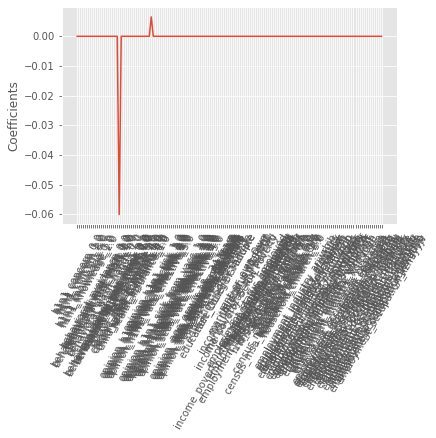


********** Logistic_regression_ROC_curve... working ...********** 

Written Model name ==>	../data/LR_Model_h1n1_vaccine.sav

Written DataFrame ==> 	../data/df_y_pred_prob_DF_N_enc_h1n1_vaccine.csv



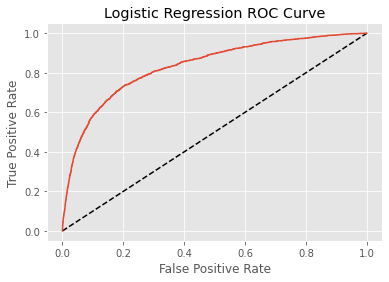


Predict Probability ==>  
[0.13835381 0.04185203 0.70671278 ... 0.44081874 0.07247184 0.0745786 ]

**********AUC_in_scikit_learn ... working ... **********


ROC_AUC SCORE ==>  	0.8331791542192184


**********AUC_using_cross_validation ... working ... **********


AUC_CV Score ==> 	[0.83501695 0.83123575 0.83704073 0.84106804 0.81933759]


**********Confusion_matrix_in_scikit_learn ... working ... **********
Confusion Matrix ... Working ....

Confusion Matrix ==> 
[[7963  436]
 [1291  993]]
Classification Report ==> 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8399
           1       0.69      0.43      0.53      2284

    accuracy                           0.84     10683
   macro avg       0.78      0.69      0.72     10683
weighted avg       0.83      0.84      0.82     10683



In [103]:
print('\n**********Run ROC_AUC_Cycle on DF_N_enc "h1n1_vaccine"********** \n')

ROC_AUC_Cycle(X_scaled, Y_scaled,
              "h1n1_vaccine",
              DF_N_enc_col_names, 
              "DF_N_enc_h1n1_vaccine",
              "LR_Model_h1n1_vaccine")

## Run ROC_AUC_Cycle on DF_N_enc "seasonal_vaccine"


**********Run ROC_AUC_Cycle on DF_N_enc "seasonal_vaccine" **********


**********Lasso ... working ...**********


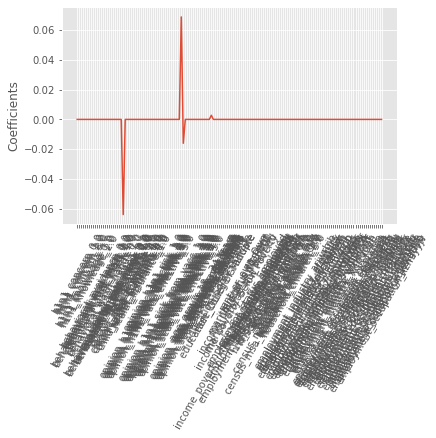


********** Logistic_regression_ROC_curve... working ...********** 

Written Model name ==>	../data/LR_Model_seasonal_vaccine.sav

Written DataFrame ==> 	../data/df_y_pred_prob_DF_N_enc_seasonal_vaccine.csv



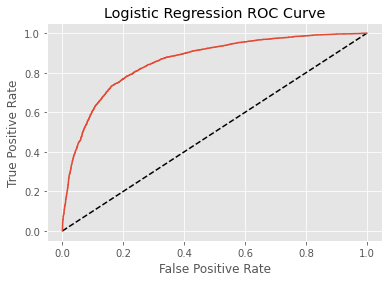


Predict Probability ==>  
[0.9433533  0.11091956 0.92086061 ... 0.65969319 0.1174393  0.30067087]

**********AUC_in_scikit_learn ... working ... **********


ROC_AUC SCORE ==>  	0.858790281038661


**********AUC_using_cross_validation ... working ... **********


AUC_CV Score ==> 	[0.85036924 0.85291009 0.85515219 0.85963492 0.85558964]


**********Confusion_matrix_in_scikit_learn ... working ... **********
Confusion Matrix ... Working ....

Confusion Matrix ==> 
[[4707 1046]
 [1238 3692]]
Classification Report ==> 
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      5753
           1       0.78      0.75      0.76      4930

    accuracy                           0.79     10683
   macro avg       0.79      0.78      0.78     10683
weighted avg       0.79      0.79      0.79     10683



In [104]:
print('\n**********Run ROC_AUC_Cycle on DF_N_enc "seasonal_vaccine" **********\n')

ROC_AUC_Cycle(X_scaled, Y_scaled,
              "seasonal_vaccine",
              DF_N_enc_col_names,
              "DF_N_enc_seasonal_vaccine",
              "LR_Model_seasonal_vaccine")

## Selecting the Number of ROWS & Columns 
## & Scale them for DF_N_enc
### This is based on review of Lasso

In [106]:
# Select / Reduce the Number of ROWS & Columns 
# & Scale it for DF_N_enc
# This is based on review of Lasso

print("\n*****Scaling & Selecting the Number of ROWS & Columns \n\t\tfor DF_N_enc from 3 to 24) *****")

print("\n**********Scaling_in_scikit_learn ... working on DF_N_enc ... **********")
Selected_X = Scaling_in_scikit_learn(DF_N_enc.iloc[:,8:77])

Selected_Y = DF_y.iloc[:,1:]

print("\n**********Selected_Y.shape for DF_N_enc ==> \t{}".format(Selected_Y.shape))
print("\n**********Selected_X.shape for DF_N_enc ==> \t{}".format(Selected_X.shape))

# Assign Column Names

Selected_X_col_names = list(DF_N_enc.columns[8:77])
Selected_Y_col_names = list(DF_y.columns[1:])

print("\n**********Selected_X_col_names for DF_N_enc Count ==> \t{}".format(len(Selected_X_col_names)))

print("\n**********Selected_X_col_names for DF_N_enc Names ==> \n{}\n********** Done ...**********".format(Selected_X_col_names))

print("\n**********Selected_Y_col_names for DF_N_enc Names ==> \n{}\n********** Done ...**********".format(Selected_Y_col_names))


*****Scaling & Selecting the Number of ROWS & Columns 
		for DF_N_enc from 3 to 24) *****

**********Scaling_in_scikit_learn ... working on DF_N_enc ... **********

Mean X ==>
behavioral_antiviral_meds_0.0    0.951286
behavioral_antiviral_meds_1.0    0.048714
behavioral_avoidance_0.0         0.272251
behavioral_avoidance_1.0         0.727749
behavioral_face_mask_0.0         0.931067
                                   ...   
education_Some College           0.278466
race_Black                       0.079305
race_Hispanic                    0.065713
race_Other or Multiple           0.060359
race_White                       0.794623
Length: 69, dtype: float64

Std X ==>
behavioral_antiviral_meds_0.0    0.215269
behavioral_antiviral_meds_1.0    0.215269
behavioral_avoidance_0.0         0.445118
behavioral_avoidance_1.0         0.445118
behavioral_face_mask_0.0         0.253341
                                   ...   
education_Some College           0.448244
race_Black                   

## Ridge Score on Selected Columns after Scaling

In [110]:
# Ridge Score 

print("\n**********Ridge_Score for Selected Columns 3 to 24 after Scaling ... working ...********** ")

print("\n**********Ridge_Score For ... DF_N_enc,  DF_y['h1n1_vaccine'] ==>********** ")
Ridge_Score(Selected_X, Selected_Y["h1n1_vaccine"])

print("\n**********Ridge_Score For ... DF_N_enc,  DF_y['seasonal_vaccine'] ==>********** ")
Ridge_Score(Selected_X, Selected_Y["seasonal_vaccine"])
                            
print("\n**********Ridge_Score For ... DF_N_enc,  DF_y ==>********** ")
Ridge_Score(Selected_X, Selected_Y)



**********Ridge_Score for Selected Columns 3 to 24 after Scaling ... working ...********** 

**********Ridge_Score For ... DF_N_enc,  DF_y['h1n1_vaccine'] ==>********** 

Ridge Score ==> 	 0.26653287148858396


**********Ridge_Score For ... DF_N_enc,  DF_y['seasonal_vaccine'] ==>********** 

Ridge Score ==> 	 0.3593592772911468


**********Ridge_Score For ... DF_N_enc,  DF_y ==>********** 

Ridge Score ==> 	 0.31294607438986966



## Spot_Check_Algorithms(Selected_X, Selected_Y["h1n1_vaccine"])


Note: It may take upto 10 minutes to complete the processing ...

**********Spot_Check_Algorithms(Selected_X, Selected_Y["h1n1_vaccine"])**********

Spot Check Algorithms ==>

evaluate each model in turn

LR_liblinear: 0.832086 (0.005109)
LR_saga: 0.832086 (0.005109)
LDA: 0.831069 (0.006561)
KNN: 0.811276 (0.008012)
CART: 0.745426 (0.008893)
NB: 0.690969 (0.008330)
SVM: 0.831925 (0.005794)

Select Best Model ... Compare Algorithms ==>


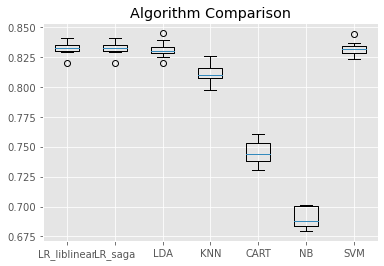


Make predictions based on model named ==> LR_liblinear

Evaluate predictions

accuracy_score ==> 	0.8395107949581929

confusion_matrix ==> 
[[6002  328]
 [ 958  725]]

classification_report ==>
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6330
           1       0.69      0.43      0.53      1683

    accuracy                           0.84      8013
   macro avg       0.78      0.69      0.72      8013
weighted avg       0.83      0.84      0.82      8013



In [107]:
print('\nNote: It may take upto 10 minutes to complete the processing ...')
print('\n**********Spot_Check_Algorithms(Selected_X, Selected_Y["h1n1_vaccine"])**********')
Spot_Check_Algorithms(Selected_X, Selected_Y["h1n1_vaccine"])

## Spot_Check_Algorithms(Selected_X, Selected_Y["seasonal_vaccine"]


Note: It may take upto 10 minutes to complete the processing ...

**********Spot_Check_Algorithms(Selected_X, Selected_Y["seasonal_vaccine"])**********


Spot Check Algorithms ==>

evaluate each model in turn

LR_liblinear: 0.772975 (0.012961)
LR_saga: 0.772975 (0.012961)
LDA: 0.772279 (0.012664)
KNN: 0.726277 (0.013041)
CART: 0.678347 (0.014412)
NB: 0.724671 (0.010319)
SVM: 0.769712 (0.011640)

Select Best Model ... Compare Algorithms ==>


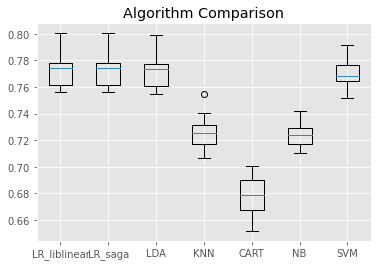


Make predictions based on model named ==> LR_liblinear

Evaluate predictions

accuracy_score ==> 	0.7885935355048047

confusion_matrix ==> 
[[3568  774]
 [ 920 2751]]

classification_report ==>
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4342
           1       0.78      0.75      0.76      3671

    accuracy                           0.79      8013
   macro avg       0.79      0.79      0.79      8013
weighted avg       0.79      0.79      0.79      8013



In [108]:
print('\nNote: It may take upto 10 minutes to complete the processing ...')
print('\n**********Spot_Check_Algorithms(Selected_X, Selected_Y["seasonal_vaccine"])**********\n')
Spot_Check_Algorithms(Selected_X, Selected_Y["seasonal_vaccine"])

## Run ROC_AUC_Cycle on Selected DF_N_enc "h1n1_vaccine"


*****Run ROC_AUC_Cycle on Selected DF_N_enc "h1n1_vaccine"***** 


**********Lasso ... working ...**********


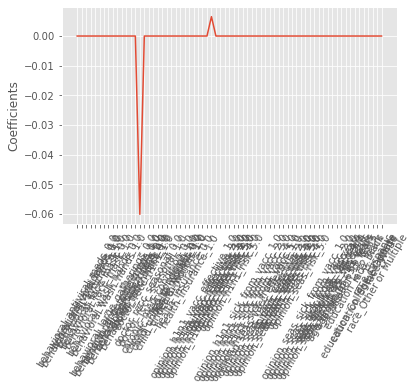


********** Logistic_regression_ROC_curve... working ...********** 

Written Model name ==>	../data/LR_Model_Selected_h1n1_vaccine.sav

Written DataFrame ==> 	../data/df_y_pred_prob_Selected_DF_N_enc_h1n1_vaccine.csv



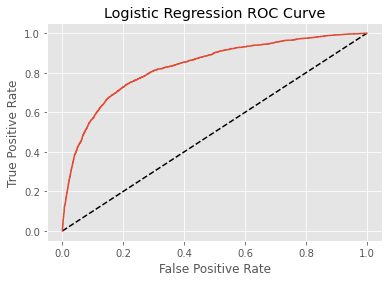


Predict Probability ==>  
[0.09879109 0.03882277 0.76169481 ... 0.44826485 0.05342184 0.06427675]

**********AUC_in_scikit_learn ... working ... **********


ROC_AUC SCORE ==>  	0.8327715083252551


**********AUC_using_cross_validation ... working ... **********


AUC_CV Score ==> 	[0.83418144 0.82884452 0.83669109 0.83909131 0.81782853]


**********Confusion_matrix_in_scikit_learn ... working ... **********
Confusion Matrix ... Working ....

Confusion Matrix ==> 
[[7978  421]
 [1316  968]]
Classification Report ==> 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8399
           1       0.70      0.42      0.53      2284

    accuracy                           0.84     10683
   macro avg       0.78      0.69      0.71     10683
weighted avg       0.82      0.84      0.82     10683



In [111]:
print('\n*****Run ROC_AUC_Cycle on Selected DF_N_enc "h1n1_vaccine"***** \n')

ROC_AUC_Cycle(Selected_X, Selected_Y,
                "h1n1_vaccine",
                Selected_X_col_names, 
                "Selected_DF_N_enc_h1n1_vaccine",
                "LR_Model_Selected_h1n1_vaccine")

## Run ROC_AUC_Cycle on Selected DF_N_enc "seasonal_vaccine"


*****Run ROC_AUC_Cycle on Selected DF_N_enc "seasonal_vaccine" *****


**********Lasso ... working ...**********


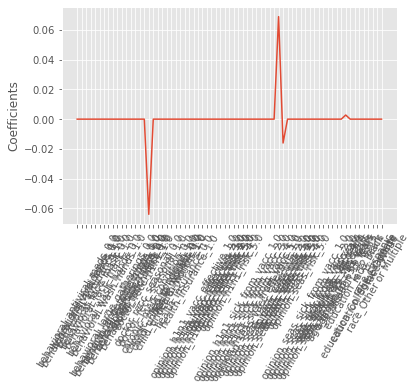


********** Logistic_regression_ROC_curve... working ...********** 

Written Model name ==>	../data/LR_Model_Selected_seasonal_vaccine.sav

Written DataFrame ==> 	../data/df_y_pred_prob_Selected_DF_N_enc_seasonal_vaccine.csv



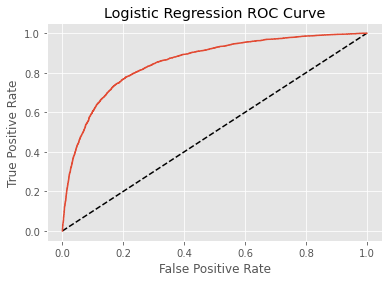


Predict Probability ==>  
[0.9203921  0.15334866 0.9025688  ... 0.65714655 0.1226762  0.2581706 ]

**********AUC_in_scikit_learn ... working ... **********


ROC_AUC SCORE ==>  	0.855627578027021


**********AUC_using_cross_validation ... working ... **********


AUC_CV Score ==> 	[0.84715575 0.85201486 0.85131577 0.85554103 0.85319971]


**********Confusion_matrix_in_scikit_learn ... working ... **********
Confusion Matrix ... Working ....

Confusion Matrix ==> 
[[4689 1064]
 [1241 3689]]
Classification Report ==> 
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      5753
           1       0.78      0.75      0.76      4930

    accuracy                           0.78     10683
   macro avg       0.78      0.78      0.78     10683
weighted avg       0.78      0.78      0.78     10683



In [112]:
print('\n*****Run ROC_AUC_Cycle on Selected DF_N_enc "seasonal_vaccine" *****\n')
ROC_AUC_Cycle(Selected_X, Selected_Y,   
              "seasonal_vaccine",
              Selected_X_col_names, 
              "Selected_DF_N_enc_seasonal_vaccine",
              "LR_Model_Selected_seasonal_vaccine")

## ROC_AUC using MACRO 

In [113]:
print('\nNote: It may take upto 10 minutes to complete the processing ... ')

# ROC_AUC using MACRO


print(__doc__)

print('\n********** ROC_AUC using MACRO **********\n')

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.svm import SVC
from numpy import interp
import sys
from sklearn.metrics import roc_auc_score

X = Selected_X

y = DF_y.iloc[:,[1,2]]

# print("\nDone 1 ...\n")

# Binarize the output

y = label_binarize(y, classes=[0, 1])

n_classes = y.shape[1]
print("\n********** n_classes = {}\n".format(n_classes))

# print("\nDone 2 ...\n")

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape

# This hangs my system therfore has been comented. In future will run it on more powerful system
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


#print("\nDone 3...\n")

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)
# print("\nDone 4...\n")

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
# print("\nDone 5...\n")

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# print("\nDone 6...\n")

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# print("\nDone 7...\n")

# Compute macro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# print("\nDone 8...\n")

print('\n********** ROC_AUC using MACRO ... Done part 1 Next step is Graph **********\n')

Automatically created module for IPython interactive environment

********** ROC_AUC using MACRO **********


********** n_classes = 2


********** ROC_AUC using MACRO ... Done part 1 Next step is Graph **********




********** Plot ROC_AUC using MACRO Graph **********



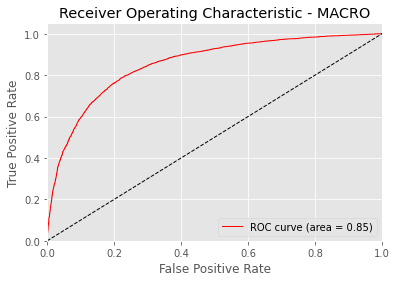


Done ...



In [114]:
print('\n********** Plot ROC_AUC using MACRO Graph **********\n')

plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - MACRO')
plt.legend(loc="lower right")
plt.show()

print("\nDone ...\n")

## ROC_AUC using MACRO - Multiclass



********** ROC_AUC using MACRO & Plot the Graph **********



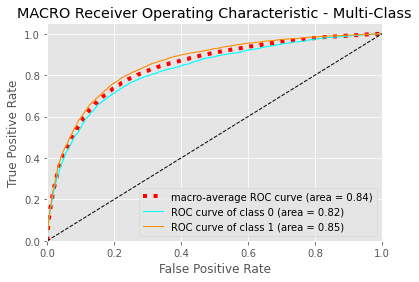


Done ...



In [115]:
print('\n********** ROC_AUC using MACRO & Plot the Graph **********\n')

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC Macro curves

plt.figure()

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='red', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MACRO Receiver Operating Characteristic - Multi-Class')
plt.legend(loc="lower right")
plt.show()

print("\nDone ...\n")


## ROC_AUC using MACRO 
###    Summary

In [116]:
print('\n********** Summary of ROC_AUC using MACRO **********\n')

y_prob = classifier.predict_proba(X_test)

# print("\nDone 1...\n")

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
# print("\nDone 2...\n")

weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
# print("\nDone 3...\n")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
# print("\nDone 4...\n")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
# print("\nDone 5...\n")

print("\nOne-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
# print("\nDone 6...\n")

print("\n\nOne-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

# print("\nDone 7...\n")

print('\n********** Summary of ROC_AUC using MACRO ... Complete **********\n')


********** Summary of ROC_AUC using MACRO **********


One-vs-One ROC AUC scores:
0.839556 (macro),
0.845110 (weighted by prevalence)


One-vs-Rest ROC AUC scores:
0.839556 (macro),
0.845110 (weighted by prevalence)

********** Summary of ROC_AUC using MACRO ... Complete **********



## Predict Probabilities & Create Submission File

## Step #1

### Select the Number of ROWS & Columns 
### & Scale the test_set_features 

In [118]:
# Select / Reduce the Number of ROWS & Columns 
# & Scale the test_set_features 

print('\n*****Select the Number of ROWS & Columns & Scale the test_set_features*****')

# Assign Column Names

Sel_X_col_names = list(dfTest_Fea_enc.columns[8:77])
                       
# Removing Respondent_id & Scaling

Sel_X = Scaling_in_scikit_learn(dfTest_Fea_enc.iloc[:,8:77][Sel_X_col_names])

print("\n**********Sel_X_col_names Count ==> \t{}".format(len(Sel_X_col_names)))
print("\n**********Sel_X_col_names Names ==> \n{}".format(Sel_X_col_names))


*****Select the Number of ROWS & Columns & Scale the test_set_features*****

Mean X ==>
behavioral_antiviral_meds_0.0    0.950502
behavioral_antiviral_meds_1.0    0.049498
behavioral_avoidance_0.0         0.268047
behavioral_avoidance_1.0         0.731953
behavioral_face_mask_0.0         0.930770
                                   ...   
education_Some College           0.278456
race_Black                       0.081399
race_Hispanic                    0.063764
race_Other or Multiple           0.057286
race_White                       0.797551
Length: 69, dtype: float64

Std X ==>
behavioral_antiviral_meds_0.0    0.216906
behavioral_antiviral_meds_1.0    0.216906
behavioral_avoidance_0.0         0.442942
behavioral_avoidance_1.0         0.442942
behavioral_face_mask_0.0         0.253845
                                   ...   
education_Some College           0.448239
race_Black                       0.273447
race_Hispanic                    0.244331
race_Other or Multiple           

## Step #2

### Load the Model & Predict Probability 
### for h1n1_vaccine in test_set_features


In [125]:
# Load the Model 
# & Predict Probability 
# for h1n1_vaccine in test_set_features

print('\n***** Load the Model & Predict Probability *****\n***** for h1n1_vaccine in test_set_features *****')
import pickle

# load the model from disk

filename = "../data/LR_Model_Selected_h1n1_vaccine.sav"
LR_Model_h1n1_vaccine = pickle.load(open(filename, 'rb'))

# Predict the Labels using the reloaded Model

Ypredict_h1n1_vaccine = LR_Model_h1n1_vaccine.predict_proba(Sel_X)[:,1] 

# Convert to DataFrame & Round to one decimal place & write to file

df_Ypredict_h1n1_vaccine = pd.DataFrame(Ypredict_h1n1_vaccine, columns=["h1n1_vaccine"])
df_Ypredict_h1n1_vaccine = df_Ypredict_h1n1_vaccine.round(1)

Full_filename_p = "test_set_features_pred_prob_" + "h1n1_vaccine"

writeCsv(df_Ypredict_h1n1_vaccine, Full_filename_p)

# print("\ndf_Predicted on Target Features ==>\n")
# print(Ypredict_h1n1_vaccine.shape)
# print(Ypredict_h1n1_vaccine)


***** Load the Model & Predict Probability *****
***** for h1n1_vaccine in test_set_features *****

Written DataFrame ==> 	../data/test_set_features_pred_prob_h1n1_vaccine.csv



## Step #3

### Load the Model & Predict Probability 
### for seasonal_vaccine in test_set_features

In [126]:
# Load the Model 
# & Predict Probability 
# for seasonal_vaccine in test_set_features


print('\n***** Load the Model & Predict Probability *****\n***** for seasonal_vaccine in test_set_features *****')
import pickle

# load the model from disk

filename = "../data/LR_Model_Selected_seasonal_vaccine.sav"
LR_Model_seasonal_vaccine = pickle.load(open(filename, 'rb'))

# Predict the Labels using the reloaded Model

Ypredict_seasonal_vaccine = LR_Model_seasonal_vaccine.predict_proba(Sel_X)[:,1] 

# Convert to DataFrame & Round to one decimal place & write to file

df_Ypredict_seasonal_vaccine = pd.DataFrame(Ypredict_seasonal_vaccine, columns=["seasonal_vaccine"])
df_Ypredict_seasonal_vaccine = df_Ypredict_seasonal_vaccine.round(1)

Full_filename_p = "test_set_features_pred_prob_" + "seasonal_vaccine"

writeCsv(df_Ypredict_seasonal_vaccine, Full_filename_p)


# print("\ndf_Predicted on Target Features ==>\n")
# print(Ypredict_seasonal_vaccine.shape)
# print(Ypredict_seasonal_vaccine)


***** Load the Model & Predict Probability *****
***** for seasonal_vaccine in test_set_features *****

Written DataFrame ==> 	../data/test_set_features_pred_prob_seasonal_vaccine.csv



## Step #4

### Merge DataFrames to create the Submission file

In [127]:
# Merge DataFrames to create the Submission file

print('\n***** Merge DataFrames to create the Submission file *****')

# respondent_id 	h1n1_vaccine 	seasonal_vaccine



# Display respondent_ids 
# print(dfTest_Fea_enc.iloc[:,[0]].head())


# Read file & Display h1n1_vaccine Propabilities
df_test_set_features_pred_prob_h1n1_vaccine = readCsv("test_set_features_pred_prob_h1n1_vaccine")

# print(df_test_set_features_pred_prob_h1n1_vaccine.iloc[:,[1]].head())

# Read file & seasonal_vaccine Propabilities
df_test_set_features_pred_prob_seasonal_vaccine = readCsv("test_set_features_pred_prob_seasonal_vaccine")

# print(df_test_set_features_pred_prob_seasonal_vaccine.iloc[:,[1]].head())

# Display shape of all of three files for probability
# print(dfTest_Fea_enc.iloc[:,[0]].shape,
#    df_test_set_features_pred_prob_h1n1_vaccine.iloc[:,[1]].shape,
#    df_test_set_features_pred_prob_seasonal_vaccine.iloc[:,[1]].shape)

test_set_features_submission = pd.concat([dfTest_Fea_enc.iloc[:,[0]], 
                df_test_set_features_pred_prob_h1n1_vaccine.iloc[:,[1]],
                df_test_set_features_pred_prob_seasonal_vaccine.iloc[:,[1]]],
                axis=1)

writeCsv(test_set_features_submission,"test_set_features_submission")

print('\n********* Submission File Created .... **********')

# Display states of submission file

print('\n********* test_set_features_submission.info() ==>\n{}\n'.format(test_set_features_submission.info()))

test_set_features_submission.head()



***** Merge DataFrames to create the Submission file *****

Opened for Reading DataFrame ==> 	../data/test_set_features_pred_prob_h1n1_vaccine.csv


Opened for Reading DataFrame ==> 	../data/test_set_features_pred_prob_seasonal_vaccine.csv


Written DataFrame ==> 	../data/test_set_features_submission.csv


********* Submission File Created .... **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   respondent_id     26708 non-null  int64  
 1   h1n1_vaccine      26708 non-null  float64
 2   seasonal_vaccine  26708 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 626.1 KB

********* test_set_features_submission.info() ==>
None



,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.1,0.3
1,26708,0.0,0.0
2,26709,0.4,0.7
3,26710,0.4,0.8
4,26711,0.3,0.4


### Alhamdulillah ... Done ...